# Problem Statement

## Context

Sebuah perusahaan pendidikan bernama X Education menjual kursus online kepada para profesional industri. Pada hari tertentu, banyak profesional yang tertarik dengan kursus tersebut denga membuka situs web mereka dan mencari kursus.

Perusahaan memasarkan kursusnya di beberapa situs web dan mesin pencari seperti Google. Setelah orang-orang ini membuka situs web, mereka mungkin mencari kursus atau mengisi formulir untuk kursus atau menonton beberapa video. Ketika orang-orang ini mengisi formulir yang memberikan alamat email atau nomor telepon mereka, mereka diklasifikasikan sebagai "Prospek". Selain itu, perusahaan juga mendapatkan arahan melalui referensi sebelumnya. Setelah prospek ini diperoleh, karyawan dari tim penjualan mulai menelepon, menulis email, dan lain-lain. Melalui proses ini, beberapa prospek dikonversi sementara sebagian besar tidak. Tingkat konversi prospek pada pendidikan X adalah sekitar 30%.

Sekarang, meskipun X Education mendapatkan banyak prospek, tingkat konversi prospeknya sangat buruk. Misalnya, mereka memperoleh 100 prospek dalam sehari, hanya sekitar 30 di antaranya yang dikonversi. Untuk membuat proses ini lebih efisien, perusahaan ingin mengidentifikasi prospek paling potensial, juga dikenal sebagai "Hot Prospek". Jika mereka berhasil mengidentifikasi kumpulan prospek ini, tingkat konversi prospek akan naik karena tim penjualan sekarang akan lebih fokus untuk berkomunikasi dengan prospek potensial daripada menelepon semua orang.

Ada banyak prospek yang dihasilkan pada tahap awal, tetapi hanya sedikit dari mereka yang keluar sebagai pelanggan yang membayar. Di tahap ini, Anda perlu memelihara prospek potensial dengan baik (yaitu memperkenalkan prospek tentang produk, terus berkomunikasi, dan lain-lain) untuk mendapatkan konversi prospek yang lebih tinggi.

X Education ingin memilih prospek yang paling menjanjikan, yaitu prospek yang kemungkinan besar akan dikonversi menjadi pelanggan yang membayar. Perusahaan mengharuskan Anda untuk membangun model di mana Anda perlu menetapkan skor prospek untuk setiap prospek sehingga pelanggan dengan skor prospek yang lebih tinggi memiliki peluang konversi yang lebih tinggi dan pelanggan dengan skor prospek yang lebih rendah memiliki peluang konversi yang lebih rendah. CEO, khususnya, telah memberikan rata-rata target tingkat konversi prospek menjadi sekitar 80%.

## Business Goals 
Buat model untuk menetapkan skor prospek antara 0 sampai 100 untuk setiap prospek yang dapat digunakan oleh perusahaan untuk menargetkan prospek potensial. Skor yang lebih tinggi berarti "Hot Prospek", yaitu kemungkinan besar akan dikonversi sedangkan skor lebih rendah berarti "Cold Prospek" dan tidak akan dikonversi. 



# Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import auc, roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report 

import joblib
import warnings
warnings.filterwarnings('ignore')
%load_ext autotime

time: 0 ns (started: 2022-01-08 20:07:07 +07:00)


In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

time: 0 ns (started: 2022-01-08 20:07:07 +07:00)


# Data Exploration

Pada tahap ini dilakukan eksplorasi data, seperti dimensi data, tipe data setiap kolom, statistik deskriptif data, mengecek apakah terdapat missing value, dan duplikat data. 

## Load Dataset

In [3]:
# Load csv file
df_lead = pd.read_csv("Lead Scoring.csv")
# Print top five rows
df_lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


time: 343 ms (started: 2022-01-08 20:07:07 +07:00)


## Dataframe Information

In [4]:
# Dataframe dimension
print("Dataframe dimension    :",df_lead.shape)
print("Dataframe size         :",df_lead.size)
print("Number of Row          :",len(df_lead.index))
print("Number of Columns      :",len(df_lead.columns))

Dataframe dimension    : (9240, 37)
Dataframe size         : 341880
Number of Row          : 9240
Number of Columns      : 37
time: 0 ns (started: 2022-01-08 20:07:07 +07:00)


In [5]:
# Dataframe information
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Statistics Description

In [6]:
# Statistics description for numerical features
df_lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


time: 172 ms (started: 2022-01-08 20:07:08 +07:00)


In [7]:
# Decstiption for categorical columns
df_lead.select_dtypes('object').describe()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240,9204,9240,9240,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,9240,9240,9240
unique,9240,5,21,2,2,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,1,2,16
top,10c2ab9c-9dd6-4c98-9d64-46201fd29500,Landing Page Submission,Google,No,No,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,No,No,Modified
freq,1,4886,2868,8506,9238,3437,6492,1942,5043,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,4146,3222,3839,2788,9240,6352,3407


time: 594 ms (started: 2022-01-08 20:07:08 +07:00)


## Check Null Values

In [8]:
# number of null values
num_null = df_lead.isnull().sum()

# percentage null values
pct_null = round((num_null/df_lead.shape[0] * 100), 2)

# Create dataframe for number of null value and percentage of null values
df_null = pd.DataFrame({
    'Null Values':num_null,
    'Percentage':pct_null}).reset_index()

# Rename column index to Feature 
df_null.rename(columns={'index':'Features'}, inplace=True)

# Filter only features with null values and sort as descending
df_null = df_null[df_null['Null Values'] > 0].sort_values('Null Values', ascending=False).reset_index(drop=True)
df_null

,Features,Null Values,Percentage
0,Lead Quality,4767,51.59
1,Asymmetrique Profile Score,4218,45.65
2,Asymmetrique Activity Score,4218,45.65
3,Asymmetrique Profile Index,4218,45.65
4,Asymmetrique Activity Index,4218,45.65
5,Tags,3353,36.29
6,Lead Profile,2709,29.32
7,What matters most to you in choosing a course,2709,29.32
8,What is your current occupation,2690,29.11
9,Country,2461,26.63


time: 62 ms (started: 2022-01-08 20:07:09 +07:00)


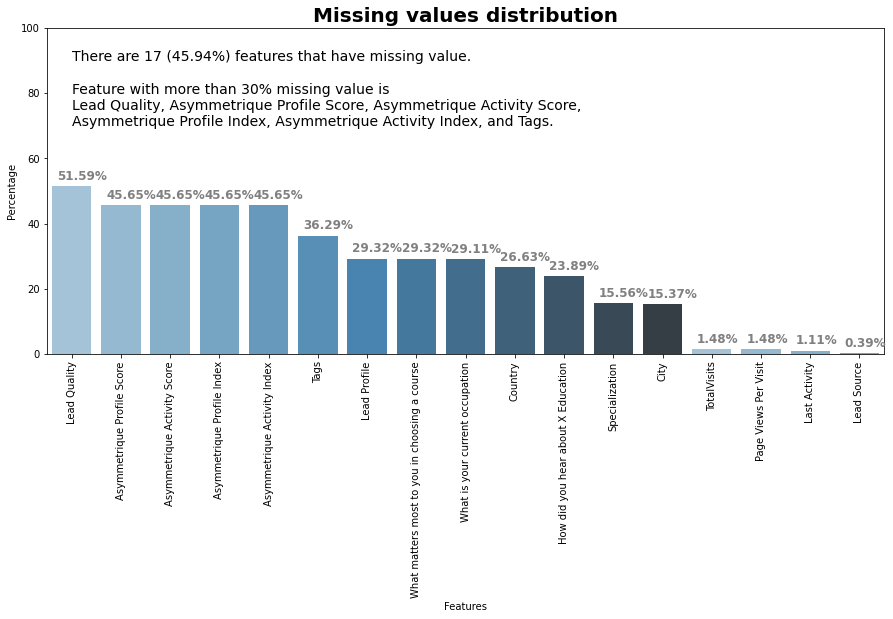

time: 1.36 s (started: 2022-01-08 20:07:09 +07:00)


In [9]:
# Plotting number of missing data
fig, ax = plt.subplots(figsize=(15,6))

g = sns.barplot(x = 'Features',y='Percentage',data=df_null,ax=ax, 
               palette=sns.color_palette("Blues_d", n_colors=13, desat=1))

x = np.arange(len(df_null['Features']))
y = df_null['Percentage']

for i, v in enumerate(y):
    ax.text(x[i]-0.3, v+2, str(v)+'%', fontsize = 12, color='gray', fontweight='bold')
    

text = '''
There are 17 (45.94%) features that have missing value.

Feature with more than 30% missing value is 
Lead Quality, Asymmetrique Profile Score, Asymmetrique Activity Score,
Asymmetrique Profile Index, Asymmetrique Activity Index, and Tags.
'''
ax.text(0,65,text,horizontalalignment='left',color='black',fontsize=14,fontweight='normal')
ax.set_title('Missing values distribution', color='black', fontsize=20, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylim(0,100)
plt.show()

Dari hasil diatas didapatkan bahwa terdapat 17 feature yang memiliki data null. 
Terdapat beberapa feature yang memiliki data null lebih dari 30%, yaitu Lead Quality, Asymmetrique Profile Score, Asymmetrique Activity Score, Asymmetrique Profile Index, Asymmetrique Activity Index, dan Tags.
Maka pada tahap data cleansing nanti kita akan menangani data tersebut.

## Check Duplicated Data

In [10]:
# Check the amount of duplicated data
num_duplicated = df_lead.duplicated().sum()
print(f"Total number of duplicate values : {num_duplicated}")

Total number of duplicate values : 0
time: 63 ms (started: 2022-01-08 20:07:10 +07:00)


Terlihat bahwa data yang kita miliki tidak terdapat data duplikat.

# Data Cleansing

Pada tahap ini lakukan pembersihan data, mulai dari handling missing value, inconsistent data, kardinalitas data, outliers, dan konversi  tipe data setiap feature sesuai dengan seharusnya.

## Handling Missing Values and Inconsistent Data

Terdapat beberapa skenario yang akan kita lakukan pada handling missing value ini : <br>
- Prospect ID & Lead Number adalah dua variabel yang hanya menunjukkan nomor ID Orang yang Dihubungi & dapat dihilangkan
- Feature  seperti Lead Quality, Tags, Asymmetrique scores dan feature profile (Lead Profile) dibuat oleh tim penjualan setelah mereka menghubungi calon prospek. Feature ini tidak akan tersedia untuk pembuatan model karena fitur ini tidak akan tersedia sebelum prospek dihubungi oleh tim penjualan. Maka feature ini dapat kita hilangkan.
- Last Notable Activity adalah feature perantara yang merupakan pembaruan saat perwakilan tim penjualan berhubungan dengan pemimpin. Dengan demikian, kita juga dapat menghapus kolom ini.
- Hapus feature yang memiliki Nilai Null lebih dari 30%.
- Feature dengan data null antara 10% sampai 30% akan dilakukan pengisian data.
- Feature dengan data null kurang dari 10% akan kita lakukan penghapusan karena tidak akan terlalu berpengaruh pada sebagian data.
- Kategori pada setiap feature yang memiliki frekuensi kecil dapat digabungkan menjadi satu kategori.

In [11]:
# List of unnecessary columns
col_drop = [
    'Prospect ID','Lead Number','Lead Profile','Lead Quality',
    'Asymmetrique Profile Score','Asymmetrique Activity Score',
    'Asymmetrique Activity Index','Asymmetrique Profile Index',
    'Tags','Last Notable Activity']

# Remove unnecessary columns
df_lead.drop(col_drop, axis=1, inplace=True)

time: 125 ms (started: 2022-01-08 20:07:10 +07:00)


In [12]:
# categorical columns
cat_col= list(df_lead.select_dtypes(exclude='number').columns)
# numerical columns
num_col = list(df_lead.select_dtypes('number').columns)

print(f'CATEGORICAL FEATURES {cat_col}')
print(f'\nNUMERICAL FEATURES {num_col}')

CATEGORICAL FEATURES ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview']

NUMERICAL FEATURES ['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
time: 94 ms (started: 2022-01-08 20:07:10 +07:00)


In [13]:
# Number of null values each features
df_null

,Features,Null Values,Percentage
0,Lead Quality,4767,51.59
1,Asymmetrique Profile Score,4218,45.65
2,Asymmetrique Activity Score,4218,45.65
3,Asymmetrique Profile Index,4218,45.65
4,Asymmetrique Activity Index,4218,45.65
5,Tags,3353,36.29
6,Lead Profile,2709,29.32
7,What matters most to you in choosing a course,2709,29.32
8,What is your current occupation,2690,29.11
9,Country,2461,26.63


time: 250 ms (started: 2022-01-08 20:07:10 +07:00)


### Categorical Features

#### Lead Source

In [14]:
# Number of category for Lead Source feature
df_lead['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
testone                 1
welearnblog_Home        1
WeLearn                 1
youtubechannel          1
Pay per Click Ads       1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

time: 16 ms (started: 2022-01-08 20:07:11 +07:00)


Kita akan ubah kategori yang tidak konsisten, yaitu google menjadi Google. KIta juga akan ubah kategori dengan frekuensi rendah menjadi Other.

In [15]:
# Replace categori with less number of unique to "Other"
df_lead['Lead Source'] = df_lead['Lead Source'].replace(
    ['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release','Social Media', 
    'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'],
    'Other')

# Replace inconsistent data
df_lead['Lead Source'] = df_lead['Lead Source'].replace({'google':'Google'})

time: 47 ms (started: 2022-01-08 20:07:11 +07:00)


#### Last Activity

In [16]:
# Number of category for Last Activity feature
df_lead['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

time: 94 ms (started: 2022-01-08 20:07:11 +07:00)


Karena kami tidak yakin apa yang bisa menjadi aktivitas Terakhir, kami akan menggantinya dengan aktivitas paling sering "Email Dibuka". Kami akan menggabungkan nilai Last Activity yang lebih kecil sebagai 'Other'.

In [17]:
# Replace categori with less number of unique to "Other Activity"
df_lead['Last Activity'].replace([
    'Had a Phone Conversation', 
    'View in browser link Clicked', 
    'Visited Booth in Tradeshow', 
    'Approached upfront',
    'Resubscribed to emails',
    'Email Received',
    'Email Marked Spam'], 'Other Activity', inplace=True)

time: 78 ms (started: 2022-01-08 20:07:11 +07:00)


#### Country

In [18]:
# Number of category for Country feature
df_lead['Country'].value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
Kuwait                  0.000590
Nigeria                 0.000590
South Africa            0.000590
Canada                  0.000590
Germany                 0.000590
Sweden                  0.000443
Belgium                 0.000295
Italy                   0.000295
Bangladesh              0.000295
Netherlands             0.000295
Ghana                   0.000295
Philippines             0.000295
China                   0.000295
Uganda                  0.000295
Asia/Pacific Region     0.000295
Indonesia               0.000148
Liberia                 0.000148
Russia    

time: 172 ms (started: 2022-01-08 20:07:11 +07:00)


Data negara sangat miring (skewed) karena 95% data dipetakan sebagai India. Maka feature Country tidak diperlukan untuk pembuatan model, dan karena X Education adalah platform online, maka feature Country juga tidak akan kita perlukan, maka kita bisa hapus feature tersebut.

In [19]:
# Remove Country feature
df_lead.drop('Country', axis=1, inplace=True)

time: 171 ms (started: 2022-01-08 20:07:11 +07:00)


#### Specialization

In [20]:
# Number of category for Specialization feature
df_lead['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

time: 15 ms (started: 2022-01-08 20:07:12 +07:00)


Pada feature Specialization ini bisa jadi prospek tidak memiliki spesialisasi atau mungkin seorang pelajar dan belum memiliki pengalaman kerja, sehingga tidak memasukkan spesialisasi apapun. Maka kita akan membuat kategori baru yaitu 'Other' untuk menggantikan nilai null.

In [21]:
# Replace wrong value to null value
df_lead['Specialization'].replace({'Select':np.nan}, inplace=True)
# Filling null value to Other
df_lead['Specialization'].fillna('Other', inplace=True)

time: 47 ms (started: 2022-01-08 20:07:12 +07:00)


#### How did you hear about X Education

In [22]:
# Number of category for How did you hear about X Education feature
df_lead['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

time: 94 ms (started: 2022-01-08 20:07:12 +07:00)


Pada feature diatas terdapat kategori yang seharunsnya tidak ada, yaitu Select. Maka kita bisa hapus kategori tersebut. Kita juga akan isi null valeu dengan nilai modus (Online Search). 

In [23]:
# Replace wrong value with null value
df_lead['How did you hear about X Education'].replace({'Select':np.nan}, inplace=True)
# Filling null value with mode (Online Search) 
df_lead['How did you hear about X Education'].fillna('Online Search', inplace=True)

time: 78 ms (started: 2022-01-08 20:07:12 +07:00)


#### What is your current occupation

In [24]:
# Number of category for Occupation feature
df_lead['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: What is your current occupation, dtype: float64

time: 203 ms (started: 2022-01-08 20:07:12 +07:00)


Kategori "Unemployed" yang paling dominan dengan 85% dari keseluruhan feature occupation. Jika kita mengisi data dengan "Unemployed" maka data akan menjadi lebih miring (skewed). Bisa jadi prospek tersebut juga tidak ingin menyebutkan pekerjaannya, maka dengan demikian, kami akan mengisi null value dengan "Other".

In [25]:
# Filling null value with Other
df_lead['What is your current occupation'].fillna('Other', inplace=True)

time: 125 ms (started: 2022-01-08 20:07:12 +07:00)


#### What matters most to you in choosing a course

In [26]:
# Number of category for What matters most to you in choosing a course feature
df_lead['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

time: 78 ms (started: 2022-01-08 20:07:13 +07:00)


Karena datanya miring (skewed) dan didominasi oleh satu kategori, kita bisa menghapus feature ini karena tidak akan berpengaruh pada model kita nantinya.

In [27]:
# Remove feature
df_lead.drop('What matters most to you in choosing a course', axis=1, inplace=True)

time: 93 ms (started: 2022-01-08 20:07:13 +07:00)


#### City

In [28]:
# Number of category for City feature
df_lead['City'].value_counts(normalize=True)

Mumbai                         0.412020
Select                         0.287596
Thane & Outskirts              0.096164
Other Cities                   0.087724
Other Cities of Maharashtra    0.058440
Other Metro Cities             0.048593
Tier II Cities                 0.009463
Name: City, dtype: float64

time: 63 ms (started: 2022-01-08 20:07:13 +07:00)


Karena ada hampir 40% nilai yang tidak diketahui, kita juga tidak dapat mengisi null value dengan nilai modus karena membuat seluruh data semakin miring (skewed). Juga, X Education adalah platform pengajaran online. Informasi kota tidak akan banyak berguna karena calon siswa dapat memperoleh kursus online dari manapun. Mka kami akan menghapus feature ini.

In [29]:
# Remove City feature
df_lead.drop('City', axis=1, inplace=True)

time: 63 ms (started: 2022-01-08 20:07:13 +07:00)


### Numerical Features

#### Total Visits

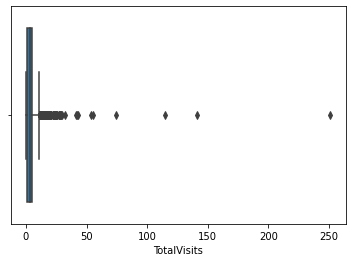

time: 391 ms (started: 2022-01-08 20:07:13 +07:00)


In [30]:
# Check distribution TotalVisist feature using boxplot
sns.boxplot(data=df_lead, x='TotalVisits')
plt.show()

#### Page Views Per Visit

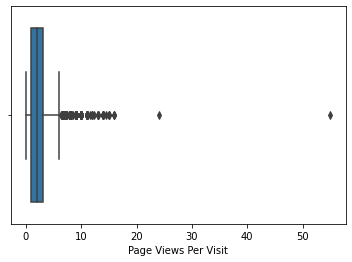

time: 297 ms (started: 2022-01-08 20:07:14 +07:00)


In [31]:
# Check distribution Page Views per Visits feature using boxplot
sns.boxplot(data=df_lead, x='Page Views Per Visit')
plt.show()

Pada feature TotalVisits dan Page Views per Visits, karena kedua feature tersebut mempunya null value kurang dari 10%, maka kita akan menghapus null value daripada mengisi nilai null tersebut.

In [32]:
# Remove null value for features with percantage less than 10%
col_drop = df_null[df_null['Percentage'] < 10].columns.to_list()
df_lead.dropna(inplace=True)

time: 31 ms (started: 2022-01-08 20:07:14 +07:00)


In [33]:
# Make sure there are no features with null values
df_lead.isnull().sum()

Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Specialization                              0
How did you hear about X Education          0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Update me on Supply Chain Content           0
Get updates on DM Content         

time: 218 ms (started: 2022-01-08 20:07:14 +07:00)


## Check Number of Unique Values

Pada tahap ini kita akan melakukan analisis pada feature kategorikal yang hanya mempunyai satu kategori. Jika kondisi tersebut terpenuhi kita akan menghapus feature tersebut karena tidak akan berpengaruh pada model kita nantinya.

### Categorical Features

In [34]:
cat_col = df_lead.select_dtypes('object').columns
# Create dataframe for number of unique values each categorical feature
df_cat_unique = pd.DataFrame(columns=['Feature', 'unique_values'])

# Repeat for each categorical features
for col in cat_col:
    # number of unique value 
    unique = df_lead[col].nunique()

    # Append number of unique values to dataframe
    df_cat_unique = df_cat_unique.append({
        'Feature':col,
        'unique_values':unique
    }, ignore_index=True).sort_values('unique_values', ascending=False)

df_cat_unique

,Feature,unique_values
0,Specialization,19
1,Last Activity,11
2,Lead Source,9
3,How did you hear about X Education,9
4,What is your current occupation,6
5,Lead Origin,4
13,Search,2
12,Do Not Email,2
11,Do Not Call,2
10,Newspaper Article,2


time: 297 ms (started: 2022-01-08 20:07:14 +07:00)


In [35]:
# List of features that have one unique value
col_drop = list(df_cat_unique[df_cat_unique['unique_values'] == 1]['Feature'])
# Remove features that have one unique value
df_lead.drop(col_drop, axis=1, inplace=True)

time: 15 ms (started: 2022-01-08 20:07:15 +07:00)


### Numerical Features

In [36]:
# Create dataframe for number of unique values each numerical feature
df_num_unique = pd.DataFrame(columns=['Feature', 'unique_values'])

# Repeat for each numerical feature
for col in num_col:
    # number of unique value
    unique = df_lead[col].nunique()

    # Append number of unique values to dataframe
    df_num_unique = df_num_unique.append({
        'Feature':col,
        'unique_values':unique
    }, ignore_index=True).sort_values('unique_values', ascending=False)

df_num_unique

,Feature,unique_values
0,Total Time Spent on Website,1717
3,Page Views Per Visit,114
1,TotalVisits,41
2,Converted,2


time: 125 ms (started: 2022-01-08 20:07:15 +07:00)


## Check Cardinality

Pada tahap ini kita pastikan kembali bahwa tidak ada feature yang memiliki inconsistent data (khusus feature kategorikal). 

In [37]:
# List of categorical features
cat_col = df_lead.select_dtypes(exclude='number').columns

# Repeat for each categorical features
for col in cat_col:
    # Print unique value
    print(f'\n{col} : ', df_lead[col].unique())


Lead Origin :  ['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import']

Lead Source :  ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Reference' 'Welingak Website' 'Facebook' 'Other']

Do Not Email :  ['No' 'Yes']

Do Not Call :  ['No' 'Yes']

Last Activity :  ['Page Visited on Website' 'Email Opened' 'Unreachable'
 'Converted to Lead' 'Olark Chat Conversation' 'Email Bounced'
 'Email Link Clicked' 'Form Submitted on Website' 'Unsubscribed'
 'Other Activity' 'SMS Sent']

Specialization :  ['Other' 'Business Administration' 'Media and Advertising'
 'Supply Chain Management' 'IT Projects Management' 'Finance Management'
 'Travel and Tourism' 'Human Resource Management' 'Marketing Management'
 'Banking, Investment And Insurance' 'International Business' 'E-COMMERCE'
 'Operations Management' 'Retail Management' 'Services Excellence'
 'Hospitality Management' 'Rural and Agribusiness' 'Healthcare Management'
 'E-Business']

How did you hear about X Educa

# Exploratory Data Analysis

## Define Function

Sebagian besar fitur dalam kumpulan data bersifat kategoris. Mari kita mulai analisis dengan melakukan analisis univariat tersegmentasi pada setiap fitur kategoris. Kami akan melihat plot batang yang akan menunjukkan jumlah total prospek yang dikonversi dan tidak dikonversi di setiap kategori.

In [38]:
# function for plotting repetitive countplots in univariate categorical analysis on the lead dataset
# This function will create two subplots: 
# 1. Count plot of categorical column w.r.t Converted; 
# 2. Percentage of converted leads within column
def univariate_categorical(feature):
    temp_count = df_lead[feature].value_counts()
    temp_perc = df_lead[feature].value_counts(normalize = True)
    df1 = pd.DataFrame({feature: temp_count.index,'Total Leads': temp_count.values,'% Values': temp_perc.values * 100})
    print(df1)

    # Calculate the percentage of Converted=1 per category value
    cat_perc = df_lead[[feature, 'Converted']].groupby([feature],as_index=False).mean()
    cat_perc["Converted"] = round((cat_perc["Converted"]*100), 2)
    cat_perc.sort_values(by='Converted', ascending=False, inplace=True)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,7))

    # 1. Subplot 1: Count plot of categorical column
    sns.set_palette("Set2")
    s = sns.countplot(
        ax=ax1, 
        x = feature,
        data=df_lead,
        hue ="Converted",
        order=cat_perc[feature],
        palette=['r','g'])

    # Define common styling
    ax1.set_title(feature, fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'black'}) 
    ax1.set_xlabel(feature, fontsize=20)
    ax1.legend(['Not Converted','Converted'])
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    # 2. Subplot 2: Percentage of defaulters within the categorical column
    x = np.arange(len(cat_perc[feature]))
    y = cat_perc['Converted']
    for i, v in enumerate(y):
        ax2.text(x[i]-0.3, v+1, str(v)+'%', fontsize = 10, color='black', fontweight='bold')

    s = sns.barplot(
        ax=ax2, 
        x = feature, 
        y='Converted', 
        data=cat_perc,
        order=cat_perc[feature])

    ax2.set_title(feature + " ( Converted % )", fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'black'}) 
    ax2.set_ylabel('Percent of Converted leads [%]', fontsize=15)
    ax2.set_xlabel(feature,fontsize=20) 
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show()    

time: 15 ms (started: 2022-01-08 20:07:15 +07:00)


In [39]:
df_lead[['Lead Source', 'Converted']].groupby(['Lead Source'],as_index=False).sum()

,Lead Source,Converted
0,Direct Traffic,818
1,Facebook,9
2,Google,1147
3,Olark Chat,448
4,Organic Search,436
5,Other,9
6,Reference,410
7,Referral Sites,31
8,Welingak Website,127


time: 204 ms (started: 2022-01-08 20:07:15 +07:00)


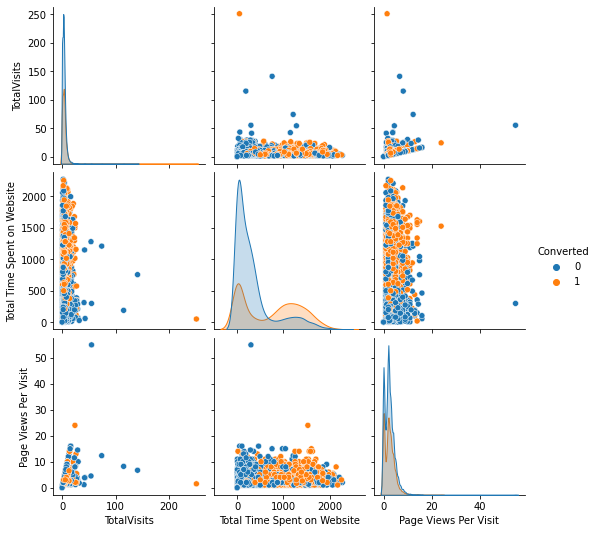

time: 10.9 s (started: 2022-01-08 20:07:16 +07:00)


In [40]:
sns.pairplot(df_lead[num_col], hue='Converted')

#### Insight:
Pada visualisasi data numerik diatas terlihat bahwa data tidak terdistribusi normal.

## Univariate Analysis

### Lead Origin

               Lead Origin  Total Leads   % Values
0  Landing Page Submission         4885  53.835133
1                      API         3578  39.431342
2            Lead Add Form          581   6.402909
3              Lead Import           30   0.330615


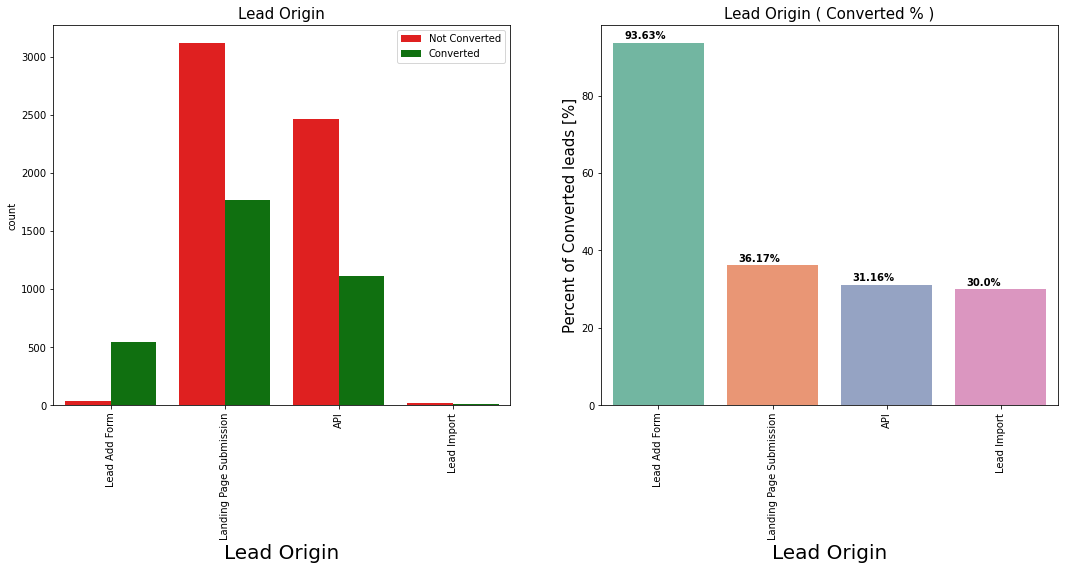

time: 719 ms (started: 2022-01-08 20:07:27 +07:00)


In [41]:
# Univariate analysis for Lead Origin feature
univariate_categorical('Lead Origin')

#### Insight :
- Sebagian besar Prospek berasal dari submission landing page dan sekitar 36% di antaranya dikonversi diikuti oleh API, di mana sekitar 31% dikonversi.
- Meskipun Lead Origins dari Quick Add Form 100% dikonversi, hanya ada 1 prospek dari kategori tersebut. 
- Prospek dari Lead Add Form adalah konversi tertinggi berikutnya dalam kategori ini di sekitar 92% dari 718 prospek.
- Lead Import sangat sedikit dalam hitungan dan tingkat konversi nya juga terendah yaitu sekitar 23%.

Untuk meningkatkan tingkat konversi prospek secara keseluruhan, kita perlu lebih fokus pada peningkatan konversi prospek asal API dan Submission Landing Page dan menghasilkan lebih banyak prospek dari Lead Add Form.

### Lead Source

        Lead Source  Total Leads   % Values
0            Google         2873  31.661891
1    Direct Traffic         2543  28.025127
2        Olark Chat         1753  19.318933
3    Organic Search         1154  12.717655
4         Reference          443   4.882081
5  Welingak Website          129   1.421644
6    Referral Sites          125   1.377562
7          Facebook           31   0.341635
8             Other           23   0.253471


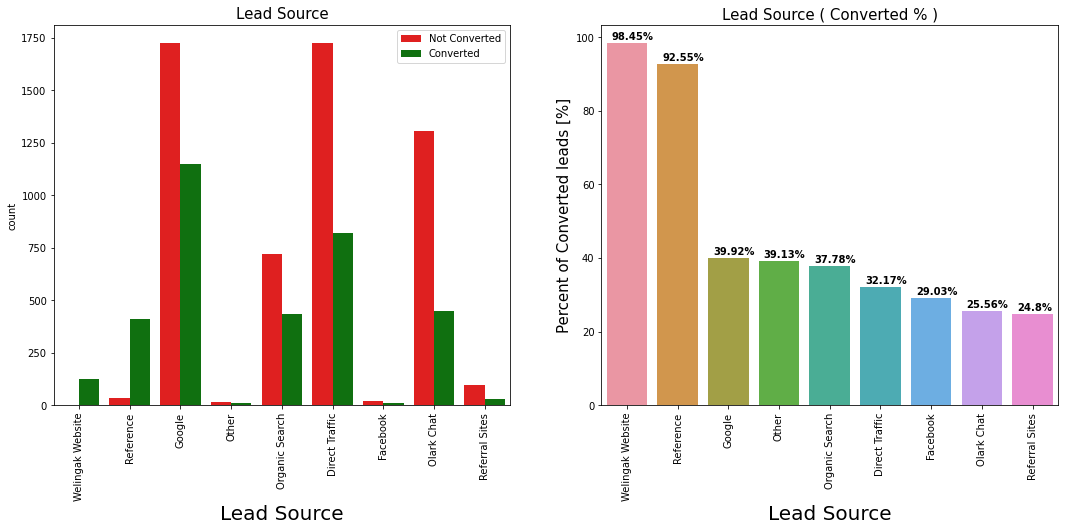

time: 891 ms (started: 2022-01-08 20:07:27 +07:00)


In [42]:
# Univariate analysis for Lead Source feature
univariate_categorical('Lead Source')

#### Insight:
- Sumber prospek sebagian besar berasal dari Google, dan sekitar 40% prospek dikonversi.
- Direct Traffic, Olark Chat dan Organic Search sumber prospek terbanyak selanjutnya dengan persentase konversi prospek masing masing 32%, 25% dan 37%.
- Prospek yang berasal dari referensi memiliki persentase konversi prospek sekitar 91%  dari total 534 prospek.
- Situs Web Welingak memiliki tingkat konversi prospek hampir 100%, yaitu 98% dari 142 prospek. Opsi ini harus dieksplorasi lebih lanjut untuk meningkatkan konversi prospek.

Untuk meningkatkan jumlah prospek, inisiatif harus diambil sehingga anggota yang sudah keluar meningkatkan referensi mereka.

### Do Not Email

  Do Not Email  Total Leads   % Values
0           No         8358  92.109323
1          Yes          716   7.890677


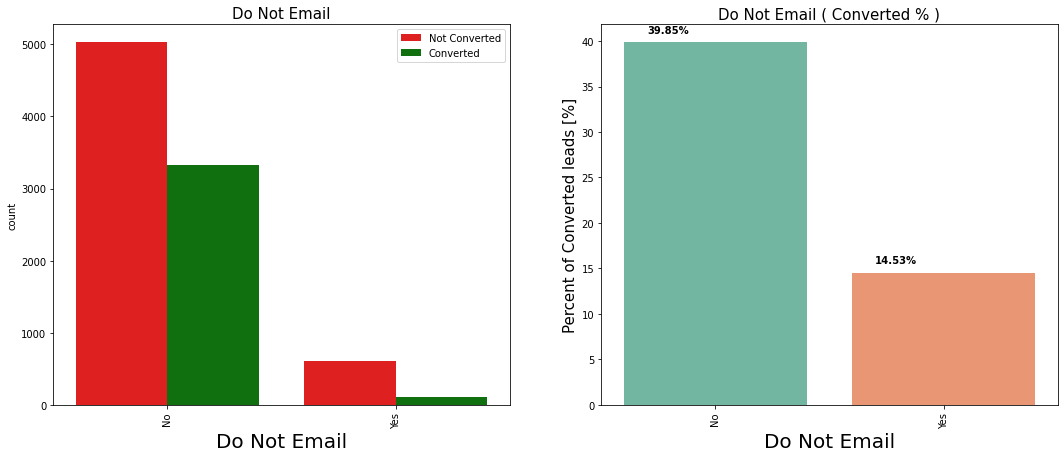

time: 625 ms (started: 2022-01-08 20:07:28 +07:00)


In [43]:
# Univariate analysis for Do Not Email feature
univariate_categorical('Do Not Email')

#### Insight
- Mayoritas orang setuju dengan menerima email (~92%)
- Orang yang setuju dengan untuk menerima email memiliki tingkat konversi sekitar 40%
- Orang yang memilih untuk tidak menerima email memiliki tingkat konversi prospek yang lebih rendah (~15%)

### Do Not Call

  Do Not Call  Total Leads   % Values
0          No         9072  99.977959
1         Yes            2   0.022041


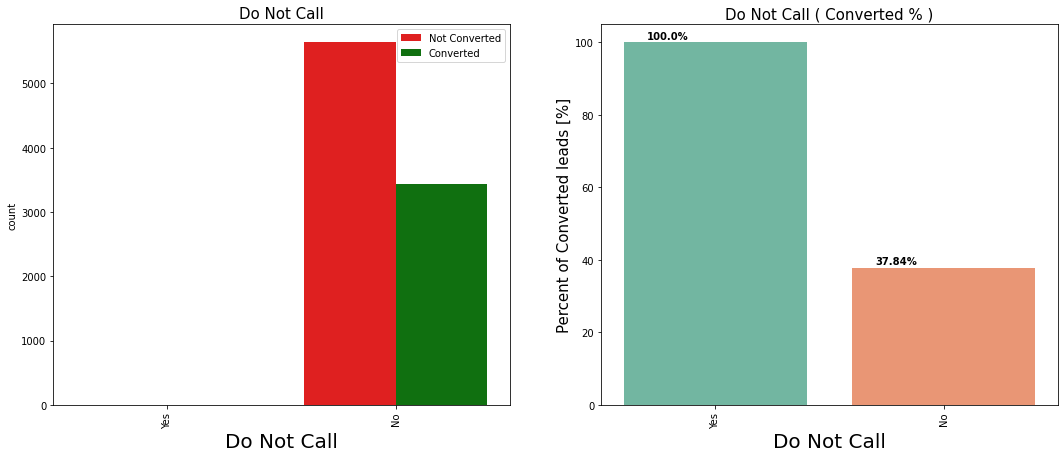

time: 515 ms (started: 2022-01-08 20:07:29 +07:00)


In [44]:
# Univariate analysis for Do Not Call feature
univariate_categorical('Do Not Call')

#### Insight
- Hampir 100% orang setuju dengan menerima panggilan (~99.97%). 
- Orang yang setuju dengan untuk menerima panggilan memiliki tingkat konversi sekitar 39%.
- Orang yang memilih untuk tidak menerima email memiliki tingkat konversi prospek sempurna yaitu 100% karena hanya dua prospek.

### Last Activity

                Last Activity  Total Leads   % Values
0                Email Opened         3432  37.822350
1                    SMS Sent         2716  29.931673
2     Olark Chat Conversation          972  10.711924
3     Page Visited on Website          640   7.053119
4           Converted to Lead          428   4.716773
5               Email Bounced          312   3.438395
6          Email Link Clicked          267   2.942473
7   Form Submitted on Website          116   1.278378
8                 Unreachable           90   0.991845
9                Unsubscribed           59   0.650209
10             Other Activity           42   0.462861


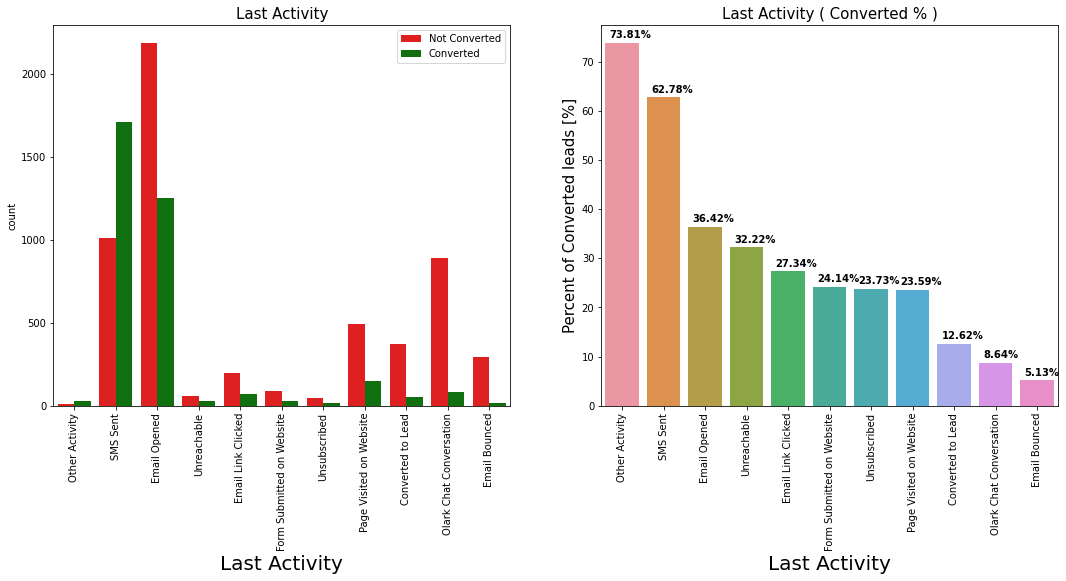

time: 954 ms (started: 2022-01-08 20:07:30 +07:00)


In [45]:
# Univariate analysis for Last Activity feature
univariate_categorical('Last Activity')

#### Insight :
- Sebagian besar prospek membuka Email mereka sebagai aktivitas terakhir mereka dengan konversi prospek sekitar 36%.
- Setelah menggabungkan jenis Aktivitas Terakhir yang lebih kecil sebagai "Other Activity", konversi prospek nya sangat tinggi (~74%).
- Tingkat konversi untuk prospek dengan aktivitas terakhir SMS Terkirim sekitar 63%.

### Specialization

                       Specialization  Total Leads   % Values
0                               Other         3282  36.169275
1                  Finance Management          959  10.568658
2           Human Resource Management          837   9.224157
3                Marketing Management          823   9.069870
4               Operations Management          499   5.499229
5             Business Administration          399   4.397179
6              IT Projects Management          366   4.033502
7             Supply Chain Management          346   3.813092
8   Banking, Investment And Insurance          335   3.691867
9                  Travel and Tourism          202   2.226141
10              Media and Advertising          202   2.226141
11             International Business          176   1.939608
12              Healthcare Management          156   1.719198
13             Hospitality Management          111   1.223275
14                         E-COMMERCE          111   1.223275
15      

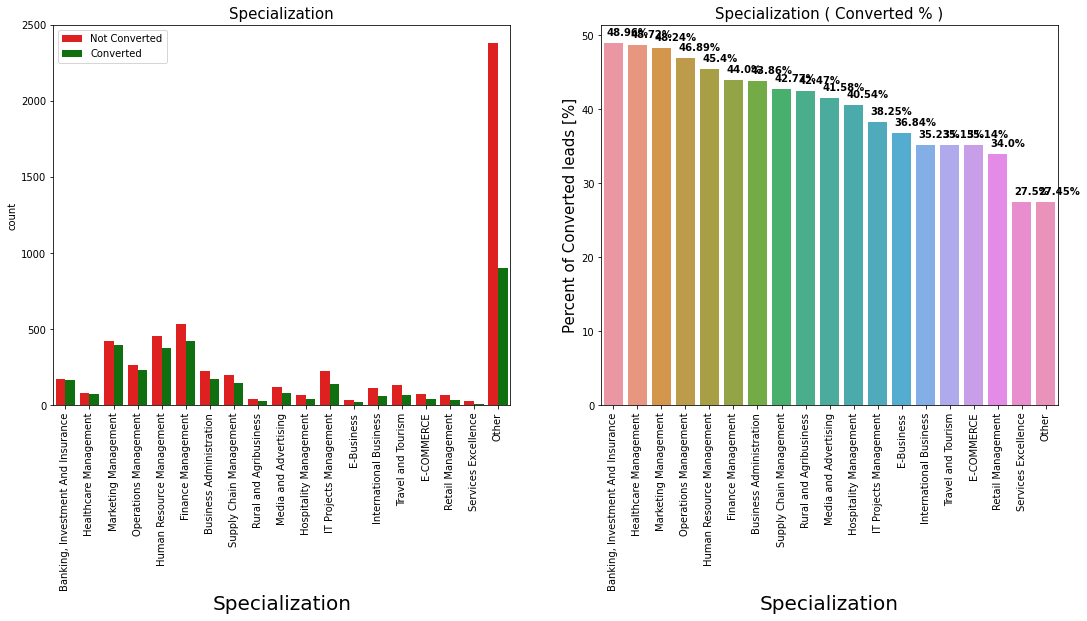

time: 2.06 s (started: 2022-01-08 20:07:31 +07:00)


In [46]:
# Univariate analysis for Specialization feature
univariate_categorical('Specialization')

#### Insight :
- Sebagian besar prospek belum menyebutkan spesialisasi dan sekitar 28% dari mereka yang dikonversi
- Prospek dengan Finance Management dan HR Management yang selanjutnya memiliki prospek paling banyak dengan tingkat konversi masing-masing 45% dan 46%.
- Services Excellence memiliki prospek paling sedikit dengan tingkat konversi sekitar 27%.

### How did you hear about X Education

  How did you hear about X Education  Total Leads   % Values
0                      Online Search         7894  86.995812
1                      Word Of Mouth          347   3.824113
2              Student of SomeSchool          310   3.416354
3                              Other          186   2.049813
4                   Multiple Sources          152   1.675116
5                     Advertisements           70   0.771435
6                       Social Media           66   0.727353
7                              Email           26   0.286533
8                                SMS           23   0.253471


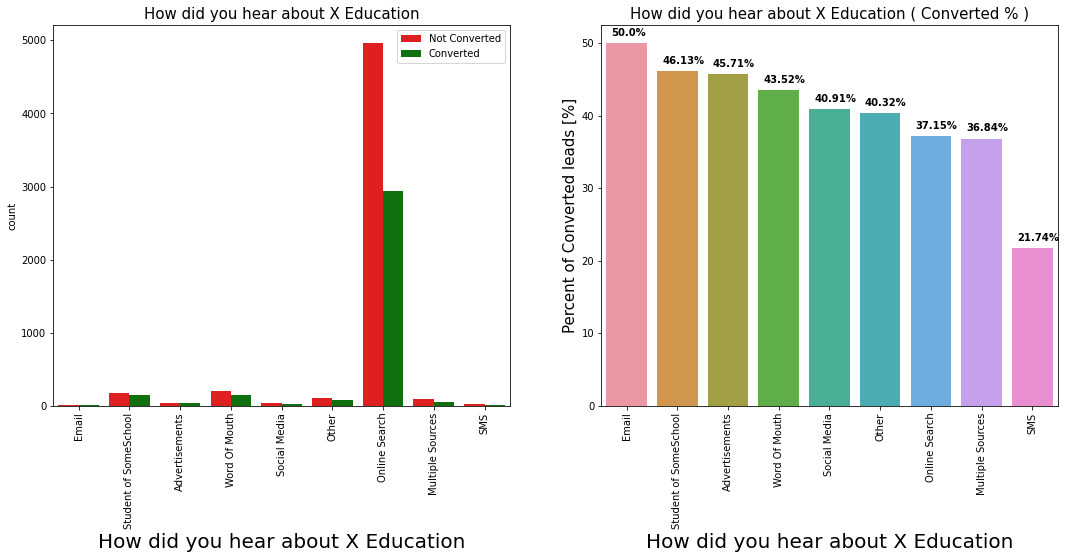

time: 1.06 s (started: 2022-01-08 20:07:33 +07:00)


In [47]:
# Univariate analysis for How did you hear about X Education feature
univariate_categorical('How did you hear about X Education')

#### Insight :
- Sebagian besar prospek mengenal X Education dari Pencarian Online (Online Search) dengan total prospek 7894 dan tingkat konversi sekitar 37%.
-  Word of Mount and Student of Somschool yang selanjutnya memiliki prospek paling banyak dengan tingkat konversi masing-masing sekitar 44% dan 46%.
- Sebagian kecil mendengar tentang X Education melalui SMS dengan total prospek 23 dengan tingkat konversi sekitar 22%. 

### What is your current occupation

  What is your current occupation  Total Leads   % Values
0                      Unemployed         5476  60.348248
1                           Other         2698  29.733304
2            Working Professional          677   7.460877
3                         Student          206   2.270223
4                       Housewife            9   0.099184
5                     Businessman            8   0.088164


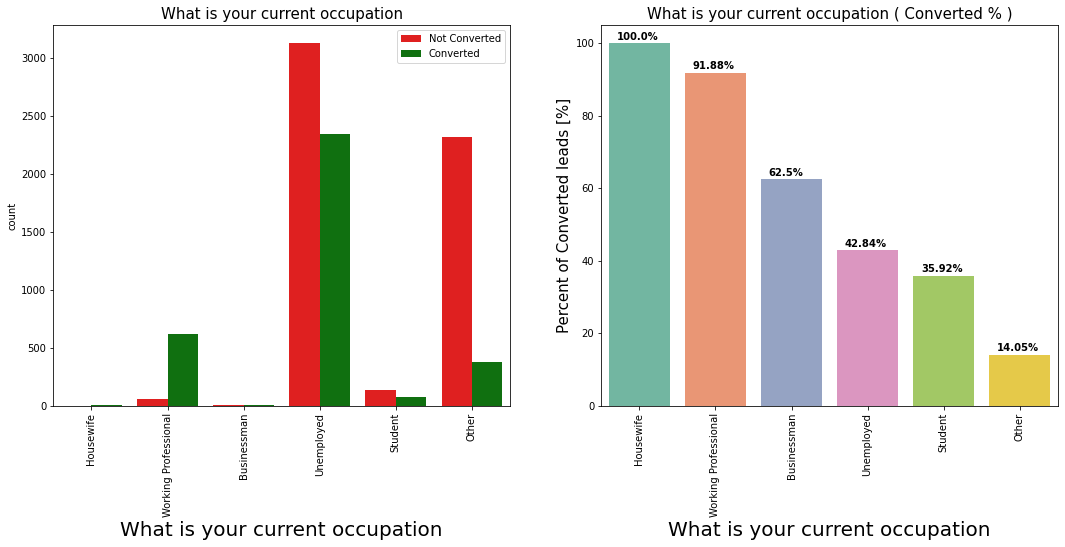

time: 953 ms (started: 2022-01-08 20:07:34 +07:00)


In [48]:
# Univariate analysis for occupation feature
univariate_categorical('What is your current occupation')

#### Insight :
- Pengangguran (Unemployee) memiliki jumlah prospek tertinggi dari beberapa pekerjaan lainnya, tetapi tingkat konversiya hanya sekitar 43%.
- Ibu Rumah Tangga memiliki tingkat konversi tertinggi dengan jumlah 9 prospek.
- Working Prosession memiliki jumlah prospek ketiga tertinggi dengan tingkat konversi tertinggi kedua yaitu sekitar 92%.

### Search

  Search  Total Leads   % Values
0     No         9060  99.845713
1    Yes           14   0.154287


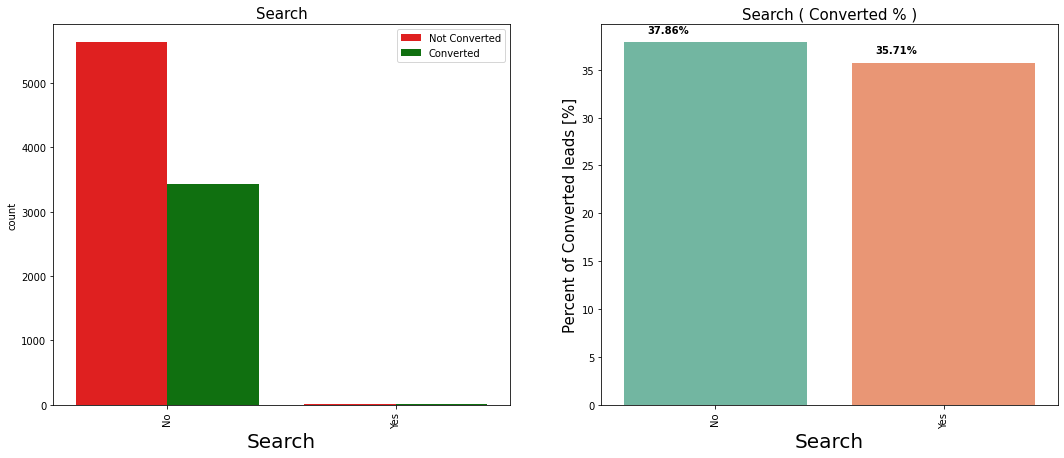

time: 640 ms (started: 2022-01-08 20:07:35 +07:00)


In [49]:
# Univariate analysis for Search feature
univariate_categorical('Search')

### Newspaper Article

  Newspaper Article  Total Leads   % Values
0                No         9072  99.977959
1               Yes            2   0.022041


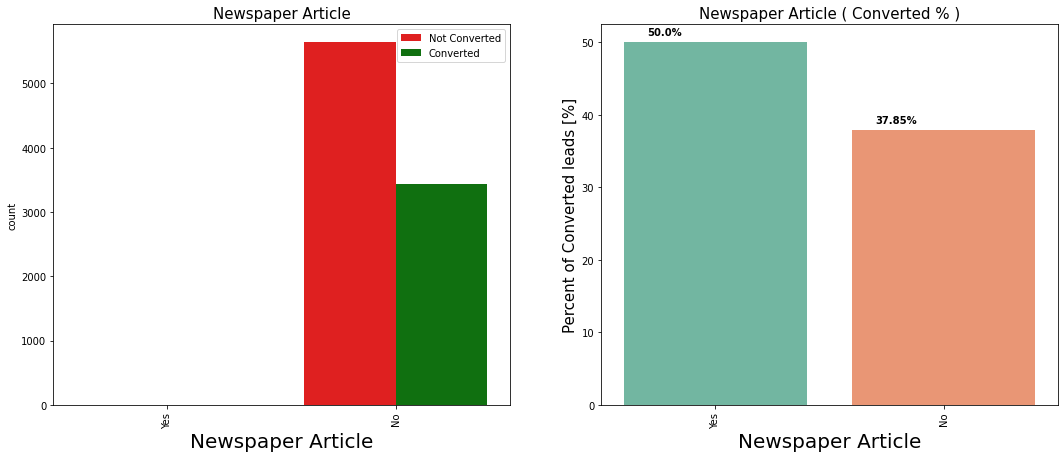

time: 547 ms (started: 2022-01-08 20:07:36 +07:00)


In [50]:
# Univariate analysis for Newspaper Article feature
univariate_categorical('Newspaper Article')

### X Education Forums

  X Education Forums  Total Leads  % Values
0                 No         9073  99.98898
1                Yes            1   0.01102


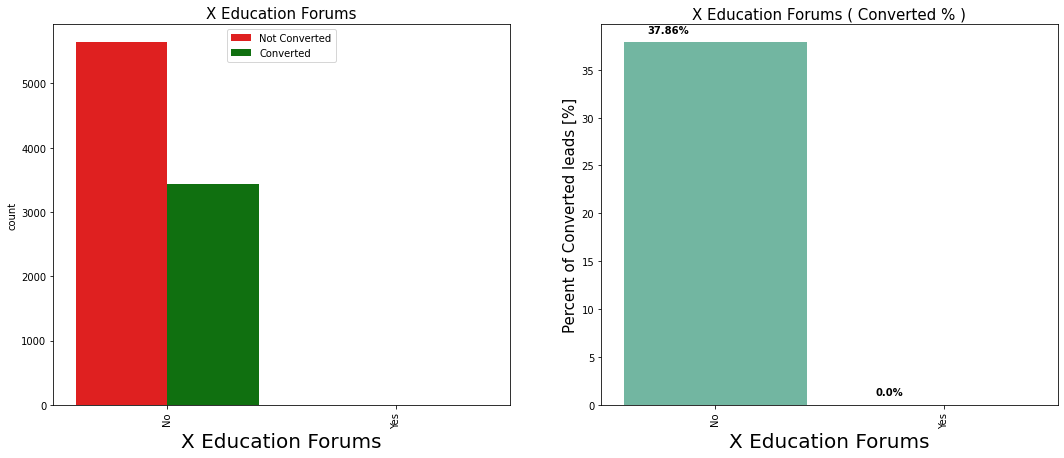

time: 688 ms (started: 2022-01-08 20:07:36 +07:00)


In [51]:
# Univariate analysis for X Education Forums feature
univariate_categorical('X Education Forums')

### Newspaper

  Newspaper  Total Leads  % Values
0        No         9073  99.98898
1       Yes            1   0.01102


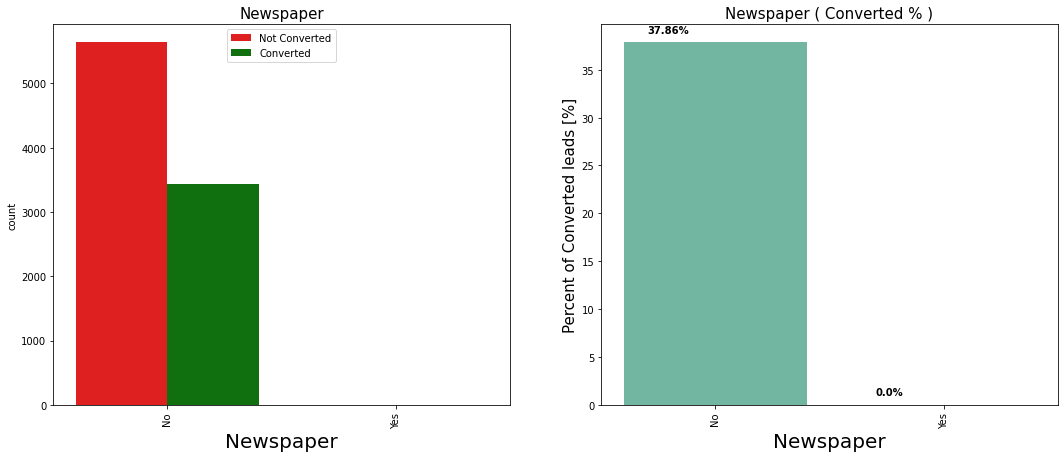

time: 500 ms (started: 2022-01-08 20:07:37 +07:00)


In [52]:
# Univariate analysis for Newspaper feature
univariate_categorical('Newspaper')

### Digital Advertisement

  Digital Advertisement  Total Leads   % Values
0                    No         9070  99.955918
1                   Yes            4   0.044082


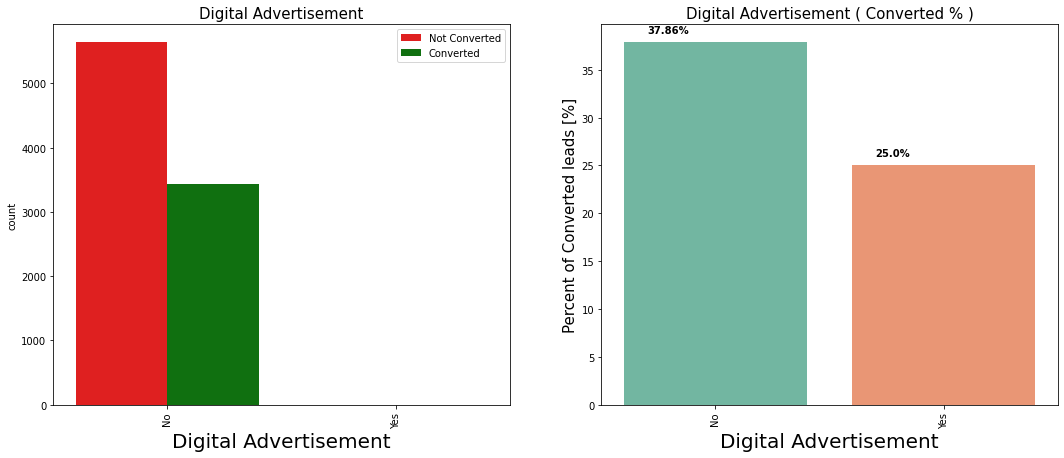

time: 594 ms (started: 2022-01-08 20:07:38 +07:00)


In [53]:
# Univariate analysis for Digital Advertisement feature
univariate_categorical('Digital Advertisement')

### Through Recommendations

  Through Recommendations  Total Leads   % Values
0                      No         9067  99.922857
1                     Yes            7   0.077143


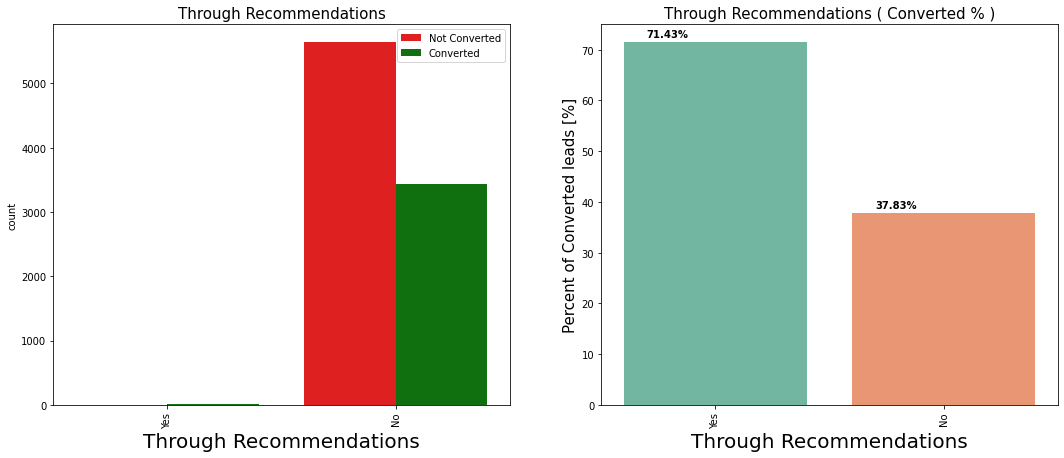

time: 500 ms (started: 2022-01-08 20:07:38 +07:00)


In [54]:
# Univariate analysis for Through Recommendations feature
univariate_categorical('Through Recommendations')

### A free copy of Mastering The Interview

  A free copy of Mastering The Interview  Total Leads   % Values
0                                     No         6186  68.172801
1                                    Yes         2888  31.827199


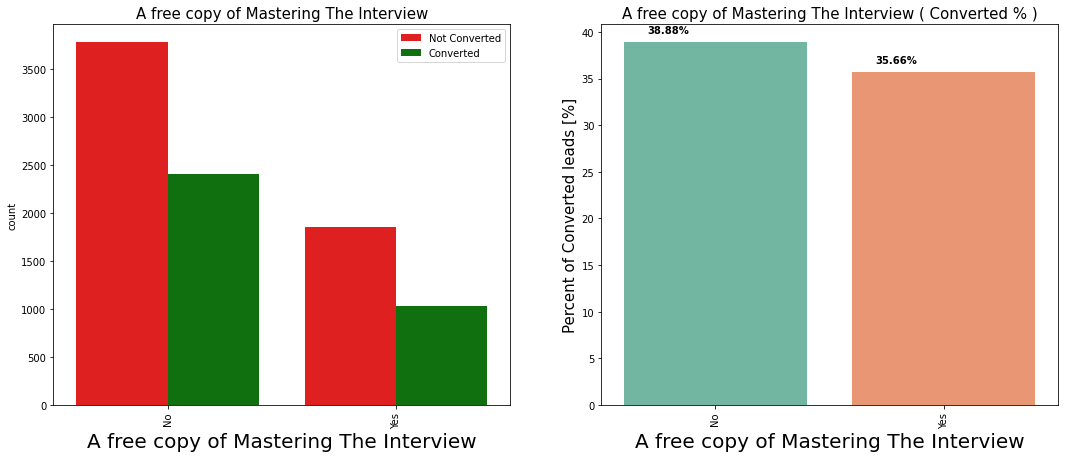

time: 547 ms (started: 2022-01-08 20:07:39 +07:00)


In [55]:
# Univariate analysis for A free copy of Mastering The Interview feature
univariate_categorical('A free copy of Mastering The Interview')

## Univariate Analysis : Numerical Features

In [56]:
num_col.remove('Converted')
num_col

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

time: 0 ns (started: 2022-01-08 20:07:39 +07:00)


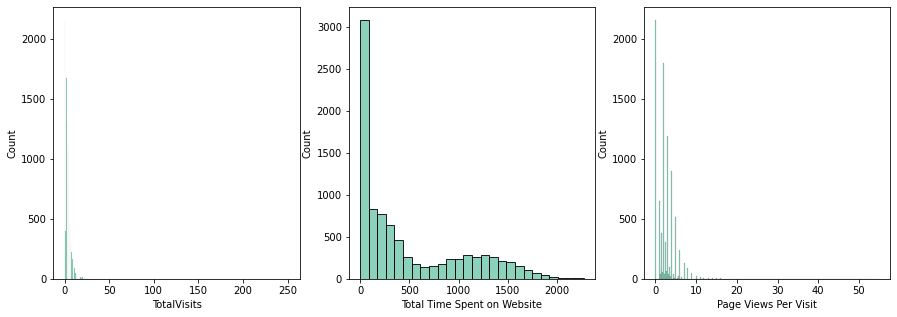

time: 3.05 s (started: 2022-01-08 20:07:39 +07:00)


In [57]:
plt.figure(figsize=(15, 5))
pos = 1

for col in num_col:
    plt.subplot(1, 3, pos)
    sns.histplot(data=df_lead, x=col)
    pos += 1

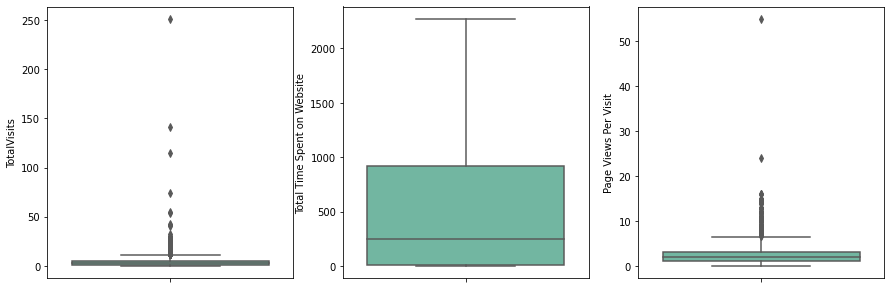

time: 468 ms (started: 2022-01-08 20:07:43 +07:00)


In [58]:
plt.figure(figsize=(15, 5))
pos = 1

for col in num_col:
    plt.subplot(1, 3, pos)
    sns.boxplot(data=df_lead, y=col)
    pos += 1

## Bivariate Analysis

## Remove Feature with Imbalanced Category

Pada beberapa feature diatas yaitu Do Not Call, Search, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, dan Through Recommendation terdapat kategori yang sangat tidak seimbang dan sangat jauh perbedaannya, ini tidak akan berpengaruh kepada performa model dan bisa menyebabkan model tidak dapat memprediksi dengan baik. Maka kita akan menghapus feature-feature tersebut.

In [59]:
# Features with unbalanced category frequency
col_drop = [
    'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 
    'Newspaper', 'Digital Advertisement', 'Through Recommendations']

# Remove features with unbalanced category frequency 
df_lead.drop(col_drop, axis=1, inplace=True)

time: 15 ms (started: 2022-01-08 20:07:43 +07:00)


## Correlation Features

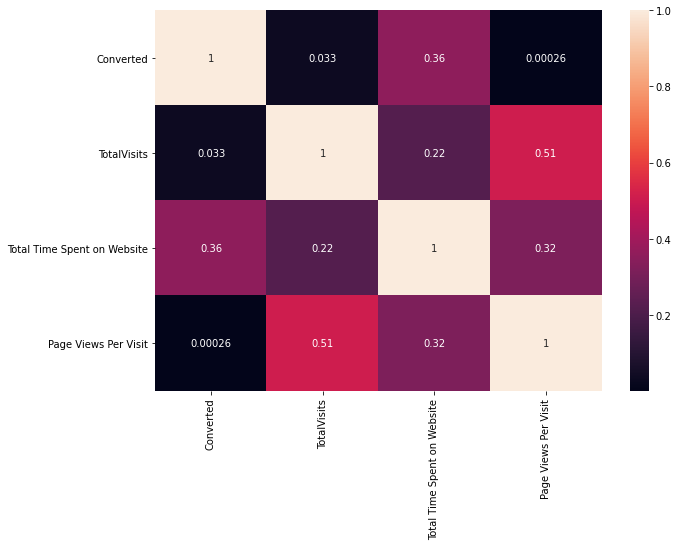

time: 516 ms (started: 2022-01-08 20:07:43 +07:00)


In [60]:
# Correlation heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(df_lead.corr(), annot=True)
plt.show()

Pada feature numerikal diatas dapat dilihat korelasi setiap feature. TotalVisits dan Page Views per Visits memiliki korelasi positif yang cukup besar. Ini cukup masuk akan karena semakin banyak halaman dilihat pada sebuah website maka semakin tinggi juga waktu yang dihabiskan di sebuah website tersebut. 

# Feature Engineering

Pada tahap feature engineering ini akan dilakukan perubahan data menjadi format yang dapat dibaca oleh model ML, rescaling, dan juga feature selection.

## Feature Encoding

Pada tahap ini kita lakukan encoding pada feature karegorikal. Pada feature Do Not Email dan A free copy of Mastering The Interview karena datanya terdapat dua kategori (Yes dan No), maka kita akan ubah menjadi binary encoding. Bisa dengan melakukan replace pada kategori tersebut akan kita bisa lakukan menggunakan Label Encoder. Untuk kali ini kita akan lakukan dengan label encoder.

In [61]:
col = ['Do Not Email', 'A free copy of Mastering The Interview']

# label encoding
for i in col:
    df_lead[i] = LabelEncoder().fit_transform(df_lead[i])

time: 16 ms (started: 2022-01-08 20:07:44 +07:00)


### One-Hot Encoding

Pada beberapa feature kita akan lakukan one-hot encoding dari pada menggunakan label encoding karena One-Hot encoding lebih cocok pada feature yang memiliki kategori yang banyak.

In [62]:
# categorical features
one_hot_col = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'How did you hear about X Education', 'What is your current occupation']
# one-hot encoding using dummies
df_one_hot = pd.get_dummies(df_lead[one_hot_col])

time: 140 ms (started: 2022-01-08 20:07:44 +07:00)


In [63]:
# Merge dataframe
df_lead = pd.concat([df_lead, df_one_hot], axis=1)
# Remove categorical features  
df_lead.drop(one_hot_col, axis=1, inplace=True)

time: 78 ms (started: 2022-01-08 20:07:44 +07:00)


In [64]:
df_lead

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Advertisements,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0.0,0,0.00,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,0,0,5.0,674,2.50,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0,1,2.0,1532,2.00,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1.0,305,1.00,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,0,1,2.0,1428,1.00,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,1,8.0,1845,2.67,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
9236,0,0,2.0,238,2.00,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
9237,1,0,2.0,199,2.00,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
9238,0,1,3.0,499,3.00,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


time: 187 ms (started: 2022-01-08 20:07:44 +07:00)


In [65]:
# Reformat data type to integer
for col in df_lead.drop(['TotalVisits', 'Page Views Per Visit'], axis=1).columns:
    df_lead[col] = df_lead[col].astype('int64')

time: 156 ms (started: 2022-01-08 20:07:44 +07:00)


## Feature Scaling

Karena sebelumnya pada feature numerikal terdapat data outliers, maka kita gunakan RobustScaler.

In [66]:
# Scaling the features
col_scaled = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'] 
df_lead[col_scaled] = RobustScaler().fit_transform(df_lead[col_scaled])
df_lead.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Advertisements,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,-0.75,-0.269811,-0.909091,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0.50,0.469427,0.227273,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0,1,-0.25,1.410474,0.000000,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,0,0,-0.50,0.064711,-0.454545,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,0,1,-0.25,1.296408,-0.454545,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


time: 110 ms (started: 2022-01-08 20:07:45 +07:00)


## Feature Selection

Karena terlalu banyak feature dan hal tersebut dapat menyebabkan model sulit untuk dilatih (memerlukan waktu lama), maka kita akan memilih 20 feature terbaik menggunakan Recursive Feature Elimination (RFE). Untuk classifier yang digunakan pada RFE ini kita gunakan GradientBoostingClassifier.

In [67]:
# Separate features and target
X = df_lead.drop('Converted', axis=1)
y = df_lead['Converted']

time: 78 ms (started: 2022-01-08 20:07:45 +07:00)


In [68]:
# Feature selection using RFE
rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=20) # running RFE with 20 variables as output
rfe = rfe.fit(X, y)

col = list(X.columns[rfe.support_])

time: 1min 11s (started: 2022-01-08 20:07:45 +07:00)


In [69]:
# Choose feature from RFE
df_lead = df_lead[col]
df_lead['Converted'] = y
df_lead.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_SMS Sent,Specialization_Other,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Working Professional,Converted
0,0,-0.75,-0.269811,-0.909091,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0.50,0.469427,0.227273,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,0,-0.25,1.410474,0.000000,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
3,0,-0.50,0.064711,-0.454545,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,-0.25,1.296408,-0.454545,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1


time: 63 ms (started: 2022-01-08 20:08:56 +07:00)


# Sampling Dataset

## Separating Train and Test Set 

In [70]:
# Separate feature and 
X = df_lead.drop('Converted', axis=1)
y = df_lead['Converted']

time: 141 ms (started: 2022-01-08 20:08:56 +07:00)


In [71]:
# Separate train and test set for modelling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and test set dimension
print('Shape of X_train', X_train.shape)
print('Shape of y_train', y_train.shape)
print('Shape of X_test', X_test.shape)
print('Shape of y_test', y_test.shape)

Shape of X_train (7259, 20)
Shape of y_train (7259,)
Shape of X_test (1815, 20)
Shape of y_test (1815,)
time: 78 ms (started: 2022-01-08 20:08:56 +07:00)


## Oversampling Using SMOTE

Karena pada target yang kita miliki terdapat imbalanced class, maka kita akan melakukan oversampling menggunakan metode SMOTE. Oversampling hanya dilakukan pada data training.

In [72]:
# Check target distribution 
pd.Series(y_train).value_counts()

0    4514
1    2745
Name: Converted, dtype: int64

time: 125 ms (started: 2022-01-08 20:08:56 +07:00)


In [73]:
X_train_over, y_train_over = SMOTE().fit_resample(X_train, y_train)

pd.Series(y_train_over).value_counts()

1    4514
0    4514
Name: Converted, dtype: int64

time: 469 ms (started: 2022-01-08 20:08:57 +07:00)


# Modelling

Pada tahap modelling kita akan membandingkan beberapa metode yang nantinya kita akan pilih mana model yang menghasilkan performa terbaik. Model dengan performa terbaik akan kita lakukan hyperparameters tuning untuk menghasilkan performa yang lebih baik lagi. 

## Choose Best Model

In [74]:
from sklearn.neural_network import MLPClassifier

# Model assignment
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier() 
abc = AdaBoostClassifier()
etc = ExtraTreesClassifier() 
gbc = GradientBoostingClassifier() 
bgc = BaggingClassifier()
knn = KNeighborsClassifier() 
logreg = LogisticRegression()
nb = GaussianNB()
svm = SVC()
xgb = XGBClassifier()
mlp = MLPClassifier()

# Assign model to a list
models = [dtc, rfc, abc, etc, gbc, bgc, knn, logreg, nb, svm, xgb, mlp]


model_name = []

# Get Classifier names for every model
for name in models:
    names = str(type(name)).split('.')[-1][:-2]
    # Append classifier names to model_name list
    model_name.append(names)

time: 172 ms (started: 2022-01-08 20:08:57 +07:00)


### Cross Validation

Pada tahap ini kita lakukan training pada seluruh data.

In [75]:
skfold = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Cross validation for each model
dtc_score = cross_val_score(models[0], X, y, scoring='accuracy', cv=skfold, n_jobs=-1, verbose=1)
rfc_score = cross_val_score(models[1], X, y, scoring='accuracy', cv=skfold, n_jobs=-1, verbose=1)
abc_score = cross_val_score(models[2], X, y, scoring='accuracy', cv=skfold, n_jobs=-1, verbose=1)
etc_score = cross_val_score(models[3], X, y, scoring='accuracy', cv=skfold, n_jobs=-1, verbose=1)
gbc_score = cross_val_score(models[4], X, y, scoring='accuracy', cv=skfold, n_jobs=-1, verbose=1)
bgc_score = cross_val_score(models[5], X, y, scoring='accuracy', cv=skfold, n_jobs=-1, verbose=1)
knn_score = cross_val_score(models[6], X, y, scoring='accuracy', cv=skfold, n_jobs=-1, verbose=1)
logreg_score = cross_val_score(models[7], X, y, scoring='accuracy', cv=skfold, n_jobs=-1, verbose=1)
nb_score = cross_val_score(models[8], X, y, scoring='accuracy', cv=skfold, n_jobs=-1, verbose=1)
svm_score = cross_val_score(models[9], X, y, scoring='accuracy', cv=skfold, n_jobs=-1, verbose=1)
xgb_score = cross_val_score(models[10], X, y, scoring='accuracy', cv=skfold, n_jobs=-1, verbose=1)
mlp_score = cross_val_score(models[11], X, y, scoring='accuracy', cv=skfold, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5

time: 57.6 s (started: 2022-01-08 20:08:57 +07:00)


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   24.6s finished


In [76]:
# List of score per model
cv_result = [
    dtc_score, rfc_score, abc_score, etc_score, gbc_score, bgc_score, 
    knn_score, logreg_score, nb_score, svm_score, xgb_score, mlp_score]

# Create dataframe for score every k-fold
df_cv_result = pd.DataFrame(cv_result, index=model_name)
df_cv_result

,0,1,2,3,4
DecisionTreeClassifier,0.767493,0.768044,0.769146,0.780165,0.769570
RandomForestClassifier,0.792837,0.809366,0.788430,0.793388,0.791069
AdaBoostClassifier,0.828650,0.833609,0.824242,0.827548,0.815325
ExtraTreesClassifier,0.788981,0.796143,0.779614,0.788430,0.783352
GradientBoostingClassifier,0.827548,0.840771,0.833058,0.834160,0.821940
BaggingClassifier,0.800000,0.805510,0.795041,0.791736,0.795480
KNeighborsClassifier,0.805510,0.821488,0.793388,0.795041,0.802095
LogisticRegression,0.831405,0.822039,0.816529,0.817080,0.799890
GaussianNB,0.773554,0.771901,0.760331,0.778512,0.750827
SVC,0.838017,0.834711,0.828650,0.819284,0.816979


time: 31 ms (started: 2022-01-08 20:09:55 +07:00)


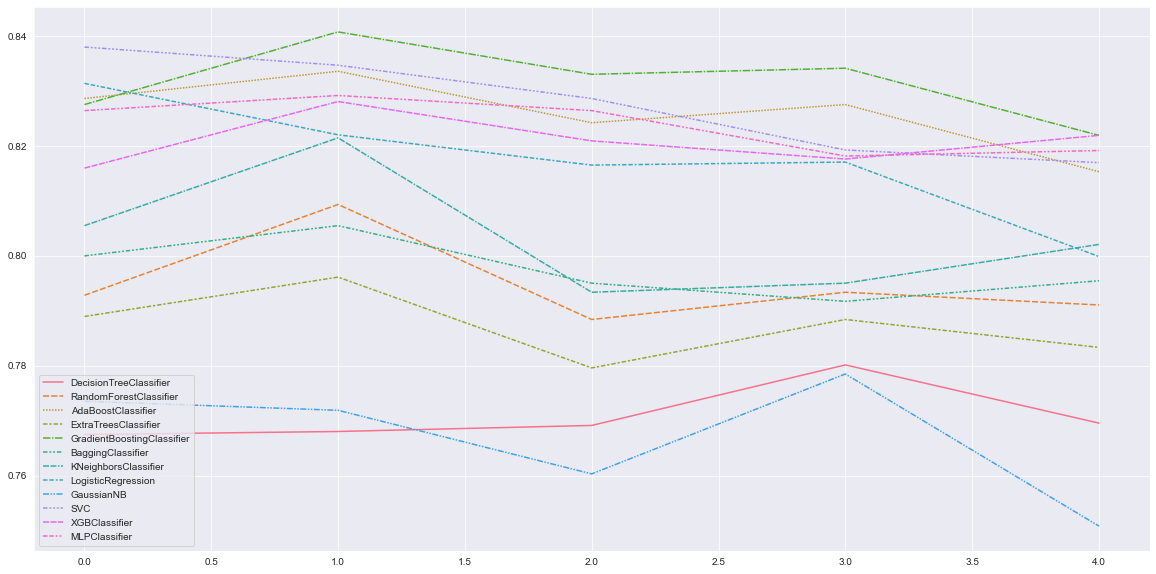

time: 1.03 s (started: 2022-01-08 20:09:55 +07:00)


In [77]:
# Plot cross validation score
sns.set_style('darkgrid')
plt.figure(figsize=(20,10))
sns.lineplot(data=df_cv_result.T)
plt.show()

In [78]:
# Calculate average for every k-fold validation
cv_mean = []
i = 0
for mean in cv_result:
    mean = cv_result[i].mean()
    cv_mean.append(mean)
    i += 1

# Calculate standard deviation for every k-fold validation
cv_std = []
i = 0 
for mean in cv_result:
    std = cv_result[i].std()
    cv_std.append(std)
    i += 1

time: 0 ns (started: 2022-01-08 20:09:56 +07:00)


In [79]:
# Average and standard deviation score for each model
df_cv = pd.DataFrame({'score_mean':cv_mean, 'score_std':cv_std}, index=model_name).sort_values(['score_mean', 'score_std'], ascending=False)
df_cv

,score_mean,score_std
GradientBoostingClassifier,0.831496,0.006363
SVC,0.827528,0.008272
AdaBoostClassifier,0.825875,0.006071
MLPClassifier,0.823892,0.004382
XGBClassifier,0.820917,0.004191
LogisticRegression,0.817388,0.010248
KNeighborsClassifier,0.803504,0.010034
BaggingClassifier,0.797553,0.004770
RandomForestClassifier,0.795018,0.007379
ExtraTreesClassifier,0.787304,0.005603


time: 31 ms (started: 2022-01-08 20:09:56 +07:00)


Pada eksperimen diatas didapatkan nilai rata-rata akurasi dan standard deviasi dari setiap k-fold validation. GradientBoostingClassifier memiliki performa terbaik dengan rata-rata akurasi mencapai 83% dengan standard deviasi 0.006.

### Fit and Evaluation

Selain dengan menggunakan Cross Validation, saya juga melakukan uji nilai akurasi pada data training dan testing yang bertujuan untuk melihat akurasi saat data training dan testing dan perbedaaannya. Maka di dapatkan hasil sebagai berikut :

In [80]:
# Create a list to assign a model score
train_score = []
test_score = []
default_models = []

skf = StratifiedKFold(random_state=42, shuffle=True)

# Create dataframe  
df_train_test = pd.DataFrame()
for train_index, test_index in skf.split(X_train_over, y_train_over):
    for i in models:
        # Fit each model
        model = i.fit(X_train_over, y_train_over)
        default_models.append(model)
        # accuracy for training set
        train_score.append(model.score(X_train_over, y_train_over))
        # accuracy for testing set
        test_score.append(model.score(X_test, y_test))

[20:10:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:11:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:11:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:12:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [81]:
# average train score model
train_score_dtc = np.sum(train_score[0::12])/len(train_score[0::12]) 
train_score_rfc = np.sum(train_score[1::12])/len(train_score[1::12])
train_score_abc = np.sum(train_score[2::12])/len(train_score[2::12])
train_score_etc = np.sum(train_score[3::12])/len(train_score[3::12])
train_score_gbc = np.sum(train_score[4::12])/len(train_score[4::12])
train_score_bgc = np.sum(train_score[5::12])/len(train_score[5::12])
train_score_knn = np.sum(train_score[6::12])/len(train_score[6::12])
train_score_logreg = np.sum(train_score[7::12])/len(train_score[7::12])
train_score_nbc = np.sum(train_score[8::12])/len(train_score[8::12])
train_score_svm = np.sum(train_score[9::12])/len(train_score[9::12])
train_score_xgb = np.sum(train_score[10::12])/len(train_score[10::12])
train_score_mlp = np.sum(train_score[11::12])/len(train_score[11::12])

# average test score model
test_score_dtc = np.sum(test_score[0::12])/len(test_score[0::12]) 
test_score_rfc = np.sum(test_score[1::12])/len(test_score[1::12])
test_score_abc = np.sum(test_score[2::12])/len(test_score[2::12])
test_score_etc = np.sum(test_score[3::12])/len(test_score[3::12])
test_score_gbc = np.sum(test_score[4::12])/len(test_score[4::12])
test_score_bgc = np.sum(test_score[5::12])/len(test_score[5::12])
test_score_knn = np.sum(test_score[6::12])/len(test_score[6::12])
test_score_logreg = np.sum(test_score[7::12])/len(test_score[7::12])
test_score_nbc = np.sum(test_score[8::12])/len(test_score[8::12])
test_score_svm = np.sum(test_score[9::12])/len(test_score[9::12])
test_score_xgb = np.sum(test_score[10::12])/len(test_score[10::12])
test_score_mlp = np.sum(test_score[11::12])/len(test_score[11::12])

time: 15 ms (started: 2022-01-08 20:13:21 +07:00)


In [82]:
# List of training accuracy for each model
trainScore = [
    train_score_dtc, train_score_rfc, train_score_abc, train_score_etc, train_score_gbc, train_score_bgc,
    train_score_knn, train_score_logreg, train_score_nbc, train_score_svm, train_score_xgb, train_score_mlp] 

# List of testing accuracy for each model
testScore = [
    test_score_dtc, test_score_rfc, test_score_abc, test_score_etc, test_score_gbc, test_score_bgc,
    test_score_knn, test_score_logreg, test_score_nbc, test_score_svm, test_score_xgb, test_score_mlp] 

# Create a dataframe to store accuracy score
df_avg_score = pd.DataFrame({
    'train score':trainScore,
    'test score':testScore},
    index=model_name)

# Create a new column for the difference in accuracy score 
df_avg_score['difference'] = abs(df_avg_score['train score'] - df_avg_score['test score'])
# Sort accuracy by smallest difference
df_avg_score = df_avg_score.sort_values(['difference'], ascending=True)
df_avg_score

,train score,test score,difference
AdaBoostClassifier,0.823660,0.826446,0.002787
LogisticRegression,0.814134,0.806612,0.007522
SVC,0.836730,0.823140,0.013590
GradientBoostingClassifier,0.842379,0.826997,0.015382
MLPClassifier,0.843620,0.816198,0.027422
GaussianNB,0.744240,0.776860,0.032619
KNeighborsClassifier,0.861874,0.800000,0.061874
XGBClassifier,0.897541,0.816529,0.081012
BaggingClassifier,0.956690,0.791956,0.164734
RandomForestClassifier,0.969517,0.777190,0.192327


time: 125 ms (started: 2022-01-08 20:13:21 +07:00)


Terlihat bahwa AdaBoostClassifier memiliki perbedaan nilai akurasi terkecil, hanya selisih 0.4%. Meskipun AdaBoostClassifier memiliki perbedaan nilai terkecil, tetapi untuk nilai akurasi pada data training dan testing lebih kecil daripada model yang lain. DecisionTreeClassifier memiliki nilai akurasi yang sangat tinggi pada data training, tetapi memiliki nilai akurasi yang cukup kecil pada data testing dengan perbedaan mencapai 20%. Bisa dikatakan bahwa DecisionTreeClassifier mengalami overfitting.

### Cross Validation for Some Metrics

Kali ini kita akan lakukan cross validation untuk mengukur performa model dengan beberapa metrik, yaitu accuracy, precision, recall, dan f1-score.

In [83]:
skfold = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Cross validation for each model
dtc_score = cross_validate(models[0], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
rfc_score = cross_validate(models[1], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
abc_score = cross_validate(models[2], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
etc_score = cross_validate(models[3], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
gbc_score = cross_validate(models[4], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
bgc_score = cross_validate(models[5], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
knn_score = cross_validate(models[6], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
logreg_score = cross_validate(models[7], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
nb_score = cross_validate(models[8], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
svm_score = cross_validate(models[9], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
xgb_score = cross_validate(models[10], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
mlp_score = cross_validate(models[11], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5

time: 54.6 s (started: 2022-01-08 20:13:22 +07:00)


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   25.7s finished


In [84]:
cv_result = [
    dtc_score, rfc_score, abc_score, etc_score, gbc_score, bgc_score, 
    knn_score, logreg_score, nb_score, svm_score, xgb_score, mlp_score]

# Average score for each metrics
df_cv_result = pd.DataFrame(cv_result, index=model_name).applymap(np.mean)
df_cv_result = df_cv_result.sort_values(['test_accuracy', 'test_recall'], ascending=False)
df_cv_result = df_cv_result.reset_index()
df_cv_result.rename(columns={'index':'Model'}, inplace=True)
df_cv_result

,Model,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,GradientBoostingClassifier,1.659360,0.020021,0.831496,0.792605,0.751674,0.771544
1,SVC,3.681560,2.111158,0.827528,0.789867,0.741776,0.764953
2,MLPClassifier,15.025849,0.015101,0.826647,0.776302,0.761572,0.768833
3,AdaBoostClassifier,0.705404,0.066235,0.825875,0.788558,0.737991,0.762400
4,XGBClassifier,2.230922,0.029396,0.820917,0.774588,0.743231,0.758506
5,LogisticRegression,0.197957,0.013317,0.817388,0.790414,0.704512,0.744889
6,KNeighborsClassifier,0.015494,0.812301,0.803504,0.748575,0.724600,0.736204
7,BaggingClassifier,0.395089,0.026363,0.799096,0.753326,0.697817,0.724440
8,RandomForestClassifier,1.494093,0.109366,0.795128,0.736063,0.715284,0.725436
9,ExtraTreesClassifier,1.737872,0.115615,0.789949,0.727655,0.711499,0.719397


time: 63 ms (started: 2022-01-08 20:14:16 +07:00)


Dari hasil diatas, GradientBoostingClassifier memiliki nilai akurasi dan dan recall yang paling tinggi dari keseluruhan model. Selain nilai akurasi, recall juga akan kita perhitungkan karena **kita lebih ingin model kita dapat mengklasifikasi lebih banyak False Positive(FP) daripada False Negative (FN)**. 
FP pada kasus ini yaitu model memprediksi prospek akan dikonversi, tetapi sebenarnya tidak dikonversi. Maka FP lebih baik daripada FN. FN yaitu model memprediksi prospek tidak akan di konversi tetapi sebenarnya dapat dikonversi, dan hal ini dapat menyebabkan semakin banyak prospek yang tidak jadi dikonversi.  

> Dari keseluruhan proses diatas, maka saya akan memilih model **GradientBoostingClassifier** karena memiliki nilai akurasi dan recall yang tertinggi. Meskipun perbedaan akurasi nya lebih besar dari AdaBoostClassifier, tetapi AdaBoostClassifier tidak cukup besar pada nilai akurasi dan recall daripada GradientBoostingClassifier.

## Gradient Boosting Classifier

### Default Parameter

In [94]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train_over, y_train_over)

y_pred = gbc.predict(X_test)

train_score_def = round((gbc.score(X_train_over, y_train_over) * 100), 2)
test_score_def = round((gbc.score(X_test, y_test) * 100), 2)
prec_score_def = round((precision_score(y_test, y_pred)) * 100, 2)
recall_score_def = round((recall_score(y_test, y_pred)) * 100, 2)

print('Training Accuracy : {}%'.format(train_score_def))
print('Test Accuracy : {}%'.format(test_score_def))
print('Precision Score : {}%'.format(prec_score_def))
print('Recall Score : {}%'.format(recall_score_def))

Training Accuracy : 84.24%
Test Accuracy : 82.64%
Precision Score : 76.67%
Recall Score : 78.12%
time: 1.67 s (started: 2022-01-08 23:15:03 +07:00)


### Tuning Hyperparameters

In [86]:
gbc = GradientBoostingClassifier()

# define parameters
params = {
    # 'loss':['deviance', 'exponential'],
    'n_estimators':range(100, 226, 25),
    # 'criterion':['friedman_mse', 'squared_error', 'mse', 'mae'],
    'max_depth':range(0, 31, 5),
    'max_features':['auto', 'sqrt', 'log2']
}

grid_result = GridSearchCV(gbc, params, scoring='accuracy', cv=5)

time: 0 ns (started: 2022-01-08 20:14:18 +07:00)


In [87]:
# Fitting grid search
grid_result.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': range(0, 31, 5),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': range(100, 226, 25)},
             scoring='accuracy')

time: 2h 39min 21s (started: 2022-01-08 20:14:18 +07:00)


In [88]:
grid_result.best_params_

{'max_depth': 10, 'max_features': 'log2', 'n_estimators': 100}

time: 0 ns (started: 2022-01-08 23:13:12 +07:00)


In [89]:
gbc_tuned = GradientBoostingClassifier(**grid_result.best_params_)
gbc_tuned.fit(X_train_over, y_train_over)

y_pred_tuned = gbc_tuned.predict(X_test)

train_score_tuned = round((gbc_tuned.score(X_train_over, y_train_over) * 100), 2)
test_score_tuned = round((gbc_tuned.score(X_test, y_test) * 100), 2)
prec_score_tuned = round((precision_score(y_test, y_pred_tuned)) * 100, 2)
recall_score_tuned = round((recall_score(y_test, y_pred_tuned)) * 100, 2)

print('Training Accuracy : {}%'.format(train_score_tuned))
print('Test Accuracy : {}%'.format(test_score_tuned))
print('Precision Score : {}%'.format(prec_score_tuned))
print('Recall Score : {}%'.format(recall_score_tuned))

Training Accuracy : 91.8%
Test Accuracy : 81.27%
Precision Score : 73.46%
Recall Score : 79.42%
time: 4.45 s (started: 2022-01-08 23:13:20 +07:00)


In [90]:
pd.DataFrame({
    'train_acc':[train_score_def, train_score_tuned],
    'test_acc':[test_score_def, test_score_tuned],
    'precision':[prec_score_def, prec_score_tuned],
    'recall':[recall_score_def, recall_score_tuned]}, index=['gbc_default', 'gbc_tuned'])

,train_acc,test_acc,precision,recall
gbc_default,84.24,82.70,76.78,78.12
gbc_tuned,91.80,81.27,73.46,79.42


time: 31 ms (started: 2022-01-08 23:13:28 +07:00)


Pada hasil diatas dapat dilihat hasil training menggunakan default parameter dan hyperparameter tuning. Dari hasil training menggunakan hyperparameter tuning, model dapat memperoleh akurasi mencapai sekitar 91.80% pada data training, tetapi menurun menjadi sekitar 81.27% pada data testing. Pada training menggunakan default parameter, model menghasilkan akurasi sekitar 84.24% pada data training dan 82.70% pada data testing. GradientBoosting dengan menggunakan default parameter menghasilkan nilai recall lebih kecil daripada pada GradientBoosting hasil hyperparameter tuning dengan perbedaan sekitar 1%.

> Dari hasil diatas, hyperparameter tuning meningkatkan akurasi dan recall pada data training dan menurunkan nilai akurasi pada data testing. Maka dapat dikatakan bahwa bahwa model mengalami sedikit overfitting. Maka pada training model ini **saya akan memilih model GradientBoostingClassifier dengan default parameter** karena perbedaan akurasi pada data training dan testing tidak terlalu jauh. Meskipun nilai recall nya lebih kecil dari pada model hasil hyperparameter tuning,tetapi perbedaannya tidak terlalu jauh.

# Model Evaluation

## Confusion Matrix

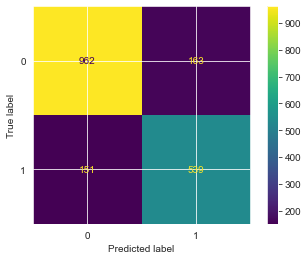

time: 734 ms (started: 2022-01-08 23:14:37 +07:00)


In [91]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()

Pada confusion matrix diatas, model dapat mengklasifikasi class 0 (Not Converted) dengan benar sebanyak 966 data dan mengklasifikasi class 1 (Converted) sebanyak 534 data.

## Classification Report

In [92]:
# Classification report model
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1125
           1       0.77      0.78      0.77       690

    accuracy                           0.83      1815
   macro avg       0.82      0.82      0.82      1815
weighted avg       0.83      0.83      0.83      1815

time: 15 ms (started: 2022-01-08 23:14:43 +07:00)


Dari hasil classification report diatas, model memperoleh akurasi sebesar 83%.

## Precision Recall and ROC Curve

In [95]:
# Precision Recall Curve
y_pred = gbc.decision_function(X_test)
prec, recall, _ = precision_recall_curve(y_test, y_pred, pos_label=gbc.classes_[1])
pr_display = PrecisionRecallDisplay(prec, recall)

time: 15 ms (started: 2022-01-08 23:15:18 +07:00)


In [96]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=gbc.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)

time: 0 ns (started: 2022-01-08 23:15:27 +07:00)


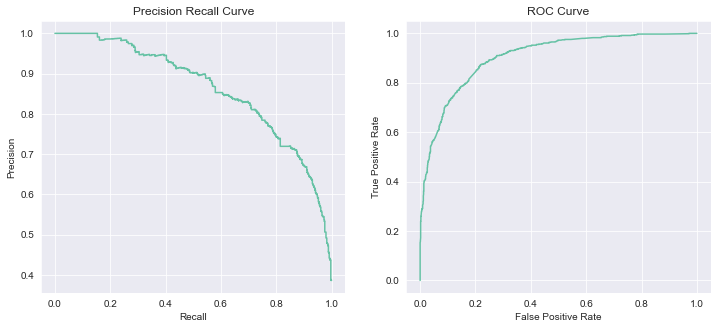

time: 1.28 s (started: 2022-01-08 23:15:30 +07:00)


In [97]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

pr_display.plot(ax=ax1)
roc_display.plot(ax=ax2)
ax1.set_title('Precision Recall Curve')
ax2.set_title('ROC Curve')
plt.show()

## Feature Importance

                                                    importance
Total Time Spent on Website                           0.353334
Lead Origin_Lead Add Form                             0.192933
Last Activity_SMS Sent                                0.121323
What is your current occupation_Other                 0.106588
What is your current occupation_Working Profess...    0.054558
TotalVisits                                           0.036197
Page Views Per Visit                                  0.027765
Do Not Email                                          0.022288
Last Activity_Olark Chat Conversation                 0.020304
Lead Origin_Landing Page Submission                   0.018683
Last Activity_Email Opened                            0.010369
Specialization_Other                                  0.009457
Last Activity_Email Bounced                           0.007280
Lead Source_Direct Traffic                            0.005328
Last Activity_Converted to Lead                       0

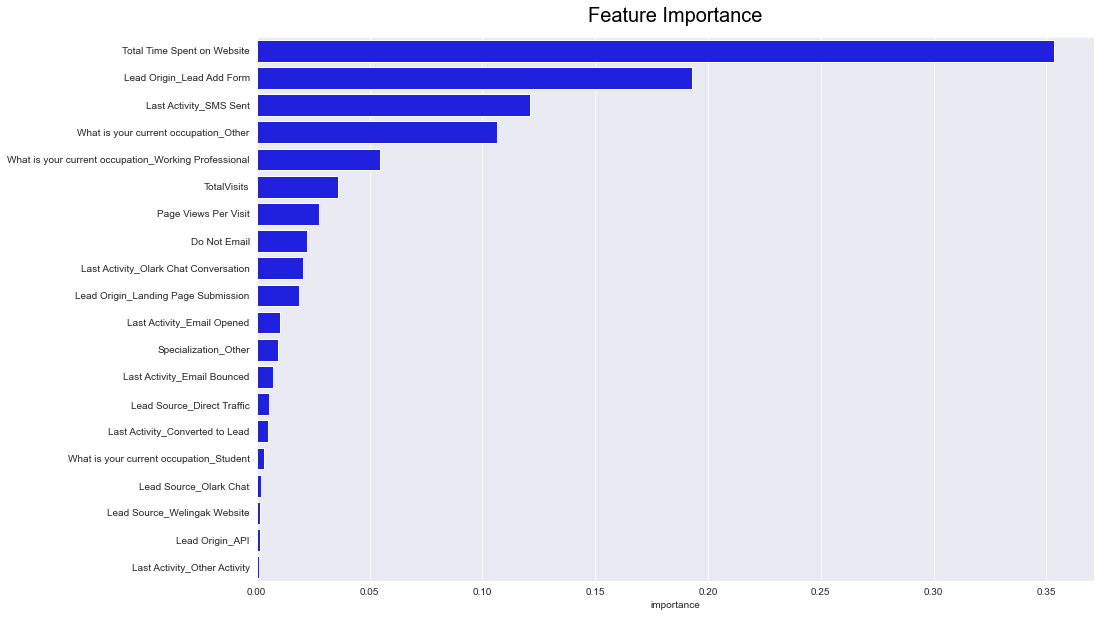

time: 969 ms (started: 2022-01-08 23:15:35 +07:00)


In [98]:
# Create dataframe for store feature importance score
feature_importance = pd.DataFrame(
    gbc.feature_importances_, 
    index = X.columns,
    columns=['importance']
).sort_values('importance', ascending=False)

print(feature_importance)

# Plotting feature importance
plt.figure(figsize=(15, 10))
sns.barplot(data=feature_importance, x='importance', y=feature_importance.index, color='blue')
plt.title('Feature Importance', fontsize=20, color='black', pad=15)
plt.show()

Pada visualisasi diatas, dapat dilihat bahwa feature Total Time Spent On Website merupakan feature yang paling penting dengan nilai 0.32. Feature Last Origin_Lead Add Form dan Last Acttivity_SMS Sent feature kedua dan ketiga yang paling penting dengan nilai masing-masing 0.18 dan 0.13  

## Thresholds Adjustment

In [99]:
# Prdiction probability
y_pred = gbc.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(f'Area Under the ROC Curve {roc_auc}')

####################################
# The optimal cut off would be where tpr is high and fpr is low
# tpr - (1-fpr) is zero or near to zero is the optimal cut off point
####################################

i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({
    'fpr':pd.Series(fpr, index=i),
    'tpr':pd.Series(tpr, index=i),
    '1-fpr':pd.Series(1-fpr, index = i),
    'tf' : pd.Series(tpr - (1-fpr), index = i), 
    'thresholds' : pd.Series(thresholds, index = i)
})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]

Area Under the ROC Curve 0.9051826086956521


,fpr,tpr,1-fpr,tf,thresholds
254,0.176,0.814493,0.824,-0.009507,0.440399


time: 46 ms (started: 2022-01-08 23:15:41 +07:00)


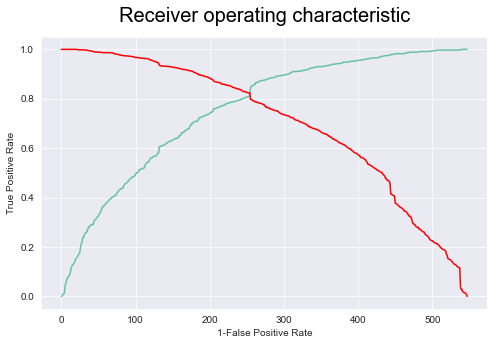

time: 2.34 s (started: 2022-01-08 23:15:50 +07:00)


In [100]:
# Plot tpr vs 1-fpr
plt.figure(figsize=(8, 5))
plt.plot(roc['tpr'])
plt.plot(roc['1-fpr'], color = 'red')
plt.xlabel('1-False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic', fontsize=20, color='black', pad=15)
plt.savefig('Receiver operating characteristic', dpi=600)
plt.show()

Dari hasil diatas didapatkan thresholds paling ideal, yaitu 0.440399.  
Maka setelah didapatkan thresholds yang optimal, maka thresholds tersebut kita gunakan untuk klasifikasi.
- Jika lebih dari nilai tersebut maka termasuk "Hot Lead"
- JIka sebaliknya berarti "Cold Lead".

In [101]:
# Create dataframe for apppying thresholds
y_pred_final = pd.DataFrame({'Converted':y_test.values, 'Converted_Prob':y_pred})
y_pred_final['final_prediction'] = y_pred_final['Converted_Prob'].apply(lambda x: 1 if x > 0.440399 else 0)
y_pred_final.head(10)

,Converted,Converted_Prob,final_prediction
0,0,0.073957,0
1,0,0.604880,1
2,0,0.440190,0
3,0,0.125788,0
4,0,0.096392,0
5,0,0.065751,0
6,1,0.871812,1
7,0,0.851047,1
8,0,0.128846,0
9,1,0.321560,0


time: 15 ms (started: 2022-01-08 23:16:07 +07:00)


### Confusion Matrix

[[927 198]
 [131 559]]


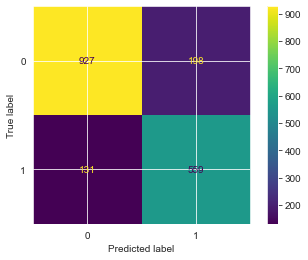

time: 422 ms (started: 2022-01-08 23:16:13 +07:00)


In [102]:
# Confusion Matrix
cm = confusion_matrix(y_pred_final['Converted'], y_pred_final['final_prediction'])
print(cm)
# Plotting confusion matrix
ConfusionMatrixDisplay(cm, display_labels=gbc.classes_).plot()
plt.show()

Dari hasil thresholds adjusment dapat dilihat bahwa hasilnya terdapat 927 berhasil diklasifikasi sebagai class 0 (Not Converted) dan sebanyak 559 diklasifikasi sebagai class 1 (Converted).

### Classification Report 

In [103]:
# Classification Report 
cr = classification_report(y_pred_final['Converted'], y_pred_final['final_prediction'])
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1125
           1       0.74      0.81      0.77       690

    accuracy                           0.82      1815
   macro avg       0.81      0.82      0.81      1815
weighted avg       0.82      0.82      0.82      1815

time: 16 ms (started: 2022-01-08 23:16:19 +07:00)


Dari hasil Precision Recall Cut-Off point, output dari model terlihat mengalami perbedaan : <br>
**Tanpa Precision Recall Trade-Off** : 
- TP (539)
- TN (962)
- FP (163)
- FN (151) <br>

Accuracy = 82.64% <br>
Precision = 76.67% <br>
Recall = 78.11%

**Dengan Precision Recall Trade-Off** :
- TP (559)
- TN (927)
- FP (198)
- FN (131)

Accuracy = 81.87% <br>
Precision = 73.84% <br>
Recall = 81.01%

Pada tujuan awal kita, CEO ingin mengidentifikasi prospek yang akan dikonversi. Karena dengan menggunakan nilai thresholds menyebabkan FN berkurang dan False Positive meningkat dan hal tersebut memperbesar nilai recall, maka kita akan menggunakan nilai thresholds.

# Save Model

In [104]:
filename = 'final_model.sav'
import pickle
pickle.dump(gbc, open(filename, 'wb'))

time: 16 ms (started: 2022-01-08 23:16:30 +07:00)
